## Sales Run_01-01-16 to 03-21-18

### Objective: To run an anlysis on the Sales dataset from Jan 01 2016 to March 21 2018 in San Mateo County.

#### Scope:
##### 1. Initial data acquistion and analysis
    a) Importing the dataset
    b) Analyzing the dataset
        -Dataset Types
        -Dataset distribution
    c) Basic insight of the dataset
##### 2. Pre-processing the dataset
    a) Identification and handling of missing values
    b) Data formatting
    c) Data normalization
    d) Data bining
    e) Categorical value analysis
##### 3. Exploratory data Analysis
    a) Descriptive statistics
    b) Groupby statistics
##### 4. Model developement
    a) SLR and evaluation

### 1. Initial data acquisition and analysis

The dataset used in this project comes from the sales run in San Mateo County. This dataset is collected from Jan 01 2016 to Mar 12 2018 and each of the entries represents features of homes that have been sold from various cities in the county of San Mateo.


In [4]:
#initial Setup
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame
import seaborn as sns

print("intial setup complete")

intial setup complete


In [5]:
#data import
data = pd.read_excel(r'C:\Users\gauthiru\Desktop\New Folder\Sales Run_01-01-16 to 03-21-18.xlsx')

In [6]:
#Viewing the initial 5 values
data.head()

,APN,DSTCDE,NBRCDE,PRCLID,CLACDE,SITUS,SALCDE,SALAMT,SALDAT,YERBLT,...,QUALITY,STORIES,POOLYEAR,VIEWQLTY,PATTERN,AMNTSQRF,FINBASE,UNFINBASE,SITUSCITY,COMPLEX
0,2023210,1,003B,002 023 210,1,217 WILSHIRE AVE,CIO-SALE,961500,20170706,1949,...,D0500,1,0,NaN,DO0045,890.28,0,470,DALY CITY,NaN
1,2024080,1,003B,002 024 080,1,165 WESTDALE AVE,CIO-SALE,792000,20160811,1949,...,D0500,0,0,NaN,DO0045,733.33,0,470,DALY CITY,NaN
2,2024210,1,003B,002 024 210,1,113 WESTDALE AVE,CIO-SALE,1282000,20170811,1949,...,D0500,1,0,NaN,DO015Z,633.09,270,250,DALY CITY,NaN
3,2024280,1,003B,002 024 280,1,114 WESTLAWN AVE,CIO-SALE,1180000,20170921,1949,...,D0500,2,0,NaN,DO045Z,698.22,0,470,DALY CITY,NaN
4,2024300,1,003B,002 024 300,1,122 WESTLAWN AVE,CIO-SALE,1100000,20170804,1949,...,D0500,2,0,NaN,DO046Z,846.15,150,320,DALY CITY,NaN


In [7]:
# "SALDAT" - the Date of Sale is jumbled and messy.
#Converting to Pandas Date time datatype
data['SALDAT'] = pd.to_datetime(data['SALDAT'], format ='%Y%m%d')
print(data['SALDAT'].head())

0   2017-07-06
1   2016-08-11
2   2017-08-11
3   2017-09-21
4   2017-08-04
Name: SALDAT, dtype: datetime64[ns]


In [8]:
#sorting the date
data.sort_values(by = 'SALDAT', inplace = True, ascending = True)
data['SALDAT'].head()

4898    2016-01-04
10156   2016-01-04
14249   2016-01-04
9759    2016-01-04
10151   2016-01-04
Name: SALDAT, dtype: datetime64[ns]

In [9]:
#setting the data index to be Date to help in our analysis
data = data.set_index('SALDAT')

In [10]:
data.head()

,APN,DSTCDE,NBRCDE,PRCLID,CLACDE,SITUS,SALCDE,SALAMT,YERBLT,ROMNUM,...,QUALITY,STORIES,POOLYEAR,VIEWQLTY,PATTERN,AMNTSQRF,FINBASE,UNFINBASE,SITUSCITY,COMPLEX
SALDAT,,,,,,,,,,,,,,,,,,,,,
2016-01-04,37067090,2,016A,037 067 090,0,NaN,CIO-SALE,320000,0,0,...,NaN,0,0,F,NaN,64.00,0,0,NaN,NaN
2016-01-04,74075250,2,039D,074 075 250,1,1161 CLOUD AVE,CIO-SALE,1760000,1951,7,...,D0450,1,0,NaN,NaN,1150.33,0,375,MENLO PARK,NaN
2016-01-04,134191610,2,091,134 191 610,7,3015 E BAYSHORE RD #161,CIO-SALE,13000,1994,0,...,NaN,0,0,NaN,NaN,11.30,0,0,REDWOOD CITY,NaN
2016-01-04,70260280,2,039B,070 260 280,1,7 VASILAKOS CT,CIO-SALE,3425000,1972,10,...,D0700,2,7979,NaN,NaN,864.90,0,0,MENLO PARK,NaN
2016-01-04,74073260,2,039D,074 073 260,1,2044 GORDON AVE,CIO-SALE,3000000,2007,10,...,D0750,2,0,NaN,NaN,1050.05,0,0,MENLO PARK,NaN


In [11]:
data.index

DatetimeIndex(['2016-01-04', '2016-01-04', '2016-01-04', '2016-01-04',
               '2016-01-04', '2016-01-04', '2016-01-04', '2016-01-04',
               '2016-01-04', '2016-01-04',
               ...
               '2018-03-21', '2018-03-21', '2018-03-21', '2018-03-21',
               '2018-03-21', '2018-03-21', '2018-03-21', '2018-03-21',
               '2018-03-21', '2018-03-21'],
              dtype='datetime64[ns]', name='SALDAT', length=14427, freq=None)

In [12]:
#extracting into sub data frames by year
data16 = data['2016']

In [13]:
#Dataset for the year 2016
data16.head()

,APN,DSTCDE,NBRCDE,PRCLID,CLACDE,SITUS,SALCDE,SALAMT,YERBLT,ROMNUM,...,QUALITY,STORIES,POOLYEAR,VIEWQLTY,PATTERN,AMNTSQRF,FINBASE,UNFINBASE,SITUSCITY,COMPLEX
SALDAT,,,,,,,,,,,,,,,,,,,,,
2016-01-04,37067090,2,016A,037 067 090,0,NaN,CIO-SALE,320000,0,0,...,NaN,0,0,F,NaN,64.00,0,0,NaN,NaN
2016-01-04,74075250,2,039D,074 075 250,1,1161 CLOUD AVE,CIO-SALE,1760000,1951,7,...,D0450,1,0,NaN,NaN,1150.33,0,375,MENLO PARK,NaN
2016-01-04,134191610,2,091,134 191 610,7,3015 E BAYSHORE RD #161,CIO-SALE,13000,1994,0,...,NaN,0,0,NaN,NaN,11.30,0,0,REDWOOD CITY,NaN
2016-01-04,70260280,2,039B,070 260 280,1,7 VASILAKOS CT,CIO-SALE,3425000,1972,10,...,D0700,2,7979,NaN,NaN,864.90,0,0,MENLO PARK,NaN
2016-01-04,74073260,2,039D,074 073 260,1,2044 GORDON AVE,CIO-SALE,3000000,2007,10,...,D0750,2,0,NaN,NaN,1050.05,0,0,MENLO PARK,NaN


In [14]:
data16.tail()

,APN,DSTCDE,NBRCDE,PRCLID,CLACDE,SITUS,SALCDE,SALAMT,YERBLT,ROMNUM,...,QUALITY,STORIES,POOLYEAR,VIEWQLTY,PATTERN,AMNTSQRF,FINBASE,UNFINBASE,SITUSCITY,COMPLEX
SALDAT,,,,,,,,,,,,,,,,,,,,,
2016-12-30,11203380,1,006A,011 203 380,1,231 HOLLY AVE,CIO-SALE,795000,1953,6,...,D0500,1,0,NaN,SC1308,716.22,0,560,SOUTH SAN FRANCISCO,NaN
2016-12-30,12070130,1,006J,012 070 130,1,70 LEO CIR,CIO-SALE,820000,1978,6,...,D0500,2,0,NaN,HT0044,515.72,0,430,SOUTH SAN FRANCISCO,NaN
2016-12-30,63522140,2,030D,063 522 140,1,1343 CAMELLIA DR,CIO-SALE,688000,1954,5,...,D0450,1,0,NaN,PL0111,674.51,0,0,EAST PALO ALTO,NaN
2016-12-30,134092490,2,091,134 092 490,7,48 MOORING LN,CIO-SALE,36000,0,0,...,NaN,0,0,NaN,NaN,0.00,0,0,DALY CITY,NaN
2016-12-30,91451450,1,033C,091 451 450,1,159 SERRAVISTA AVE,CIO-SALE,920000,2003,7,...,D0650,3,0,A,CE2080,442.31,0,0,DALY CITY,NaN


In [15]:
#dataset for the year 2017
data17 = data['2017']

In [16]:
data17.head()

,APN,DSTCDE,NBRCDE,PRCLID,CLACDE,SITUS,SALCDE,SALAMT,YERBLT,ROMNUM,...,QUALITY,STORIES,POOLYEAR,VIEWQLTY,PATTERN,AMNTSQRF,FINBASE,UNFINBASE,SITUSCITY,COMPLEX
SALDAT,,,,,,,,,,,,,,,,,,,,,
2017-01-03,27051060,1,012F,027 051 060,1,123 LOMA VISTA DR,CIO-SALE,1688000,1950,8,...,D0500,1,0,F,NaN,992.94,0,0,BURLINGAME,NaN
2017-01-03,32186050,8,112B,032 186 050,2,415 N DELAWARE ST,CIO-SALE,1100000,0,940,...,N,0,0,N,NaN,1100000.00,0,0,SAN MATEO,NaN
2017-01-03,43321150,2,054B,043 321 150,1,2826 SAN JUAN BLV,CIO-SALE,1921000,1976,9,...,D0650,2,0,NaN,NaN,803.77,0,460,BELMONT,NaN
2017-01-03,53113040,9,109C,053 113 040,2,453 ROOSEVELT AVE,CIO-SALE,875000,0,926,...,N,0,0,N,NaN,875000.00,0,0,REDWOOD CITY,NaN
2017-01-03,101070480,1,205,101 070 480,97,395 IMPERIAL WAY,CIO-SALE,489000,1974,4,...,NaN,1,1,NaN,DC,577.33,0,0,DALY CITY,CROWN COLONY


In [17]:
data17.tail()

,APN,DSTCDE,NBRCDE,PRCLID,CLACDE,SITUS,SALCDE,SALAMT,YERBLT,ROMNUM,...,QUALITY,STORIES,POOLYEAR,VIEWQLTY,PATTERN,AMNTSQRF,FINBASE,UNFINBASE,SITUSCITY,COMPLEX
SALDAT,,,,,,,,,,,,,,,,,,,,,
2017-12-29,39231170,1,017D,039 231 170,1,5 ROCKWOOD CT,CIO-SALE,1675000,1956,7,...,D0600,0,0,G,NaN,817.07,0,0,SAN MATEO,NaN
2017-12-29,40023020,1,050C,040 023 020,1,2212 KENT ST,CIO-SALE,1325000,1956,6,...,D0500,1,0,NaN,CU00F2,1003.79,0,0,SAN MATEO,NaN
2017-12-29,39200510,1,017D,039 200 510,1,3119 SUNSET TER,CIO-SALE,2350000,1955,6,...,D0600,1,0,NaN,NaN,1312.85,0,0,SAN MATEO,NaN
2017-12-29,47192410,2,016A,047 192 410,1,119 EL GRANADA BLV,CIO-SALE,1280500,1995,9,...,D0550,2,0,F,NaN,498.25,260,0,EL GRANADA,NaN
2017-12-29,23331220,1,009C,023 331 220,1,1615 LINDA MAR BLV,CIO-SALE,970000,1955,6,...,D0450,0,0,NaN,SB043Z,678.32,0,0,PACIFICA,NaN


In [18]:
#dataset for the year 2018
data18 = data['2018']

In [19]:
data18.head()

,APN,DSTCDE,NBRCDE,PRCLID,CLACDE,SITUS,SALCDE,SALAMT,YERBLT,ROMNUM,...,QUALITY,STORIES,POOLYEAR,VIEWQLTY,PATTERN,AMNTSQRF,FINBASE,UNFINBASE,SITUSCITY,COMPLEX
SALDAT,,,,,,,,,,,,,,,,,,,,,
2018-01-02,20392050,8,110D,020 392 050,4,489 HUNTINGTON AVE,CIO-SALE,1500000,0,965,...,N,0,0,N,NaN,1500000.00,0,0,SAN BRUNO,NaN
2018-01-02,45273050,2,053E,045 273 050,1,1633 KING ST,CIO-SALE,1502000,1960,6,...,D0550,1,0,G,NaN,1035.86,430,1040,BELMONT,NaN
2018-01-02,117240210,1,213,117 240 210,97,1246 EDMONSON WAY,CIO-SALE,1010000,2017,7,...,V,3,0,NaN,MF2,563.62,0,0,SOUTH SAN FRANCISCO,SOUTH CITY PLACE
2018-01-02,9555110,1,033A,009 555 110,1,424 LYNBROOK DR,CIO-SALE,935000,1964,6,...,D0550,1,0,NaN,DOF041,713.74,0,0,PACIFICA,NaN
2018-01-02,52031010,2,063C,052 031 010,1,999 EDGEWOOD RD,CIO-SALE,3195000,1941,9,...,D0800,1,0,NaN,NaN,691.56,0,620,REDWOOD CITY,NaN


In [20]:
data18.tail()

,APN,DSTCDE,NBRCDE,PRCLID,CLACDE,SITUS,SALCDE,SALAMT,YERBLT,ROMNUM,...,QUALITY,STORIES,POOLYEAR,VIEWQLTY,PATTERN,AMNTSQRF,FINBASE,UNFINBASE,SITUSCITY,COMPLEX
SALDAT,,,,,,,,,,,,,,,,,,,,,
2018-03-21,10244210,1,005D,010 244 210,1,656 JOAQUIN DR,CIO-SALE,1250000,1955,6,...,D0500,0,0,NaN,01300Z,833.33,0,0,SOUTH SAN FRANCISCO,NaN
2018-03-21,27153070,1,013A,027 153 070,1,1357 COLUMBUS AVE,CIO-SALE,2200000,1929,6,...,D0550,0,0,NaN,NaN,1309.52,0,0,BURLINGAME,NaN
2018-03-21,6344410,1,004G,006 344 410,1,1657 ANNIE ST,CIO-SALE,1197500,2017,6,...,D0600,2,0,NaN,PLAN 2,577.39,0,473,DALY CITY,NaN
2018-03-21,70343020,2,028F,070 343 020,1,227 PARK LN,CIO-SALE,7944000,1936,14,...,D0850,2,2005,NaN,NaN,1211.90,0,0,ATHERTON,NaN
2018-03-21,69301550,2,067A,069 301 550,1,20 HILARY LN,CIO-SALE,2100000,1959,7,...,D0500,1,0,NaN,NaN,1060.61,0,0,REDWOOD CITY,NaN


We have 3 sub data frames sorted by their respective sale date years.
- data16 = 2016 sales
- data17 = 2017 sales
- data18 = 2018 sales

- data = just sorted data

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14427 entries, 2016-01-04 to 2018-03-21
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   APN        14427 non-null  int64  
 1   DSTCDE     14427 non-null  int64  
 2   NBRCDE     14427 non-null  object 
 3   PRCLID     14427 non-null  object 
 4   CLACDE     14427 non-null  int64  
 5   SITUS      14225 non-null  object 
 6   SALCDE     14427 non-null  object 
 7   SALAMT     14427 non-null  int64  
 8   YERBLT     14427 non-null  int64  
 9   ROMNUM     14427 non-null  int64  
 10  BEDNUM     14427 non-null  int64  
 11  BTHNUM     14427 non-null  float64
 12  SQRFT      14427 non-null  int64  
 13  LOTARA     14427 non-null  int64  
 14  QUALITY    11631 non-null  object 
 15  STORIES    14427 non-null  int64  
 16  POOLYEAR   14427 non-null  int64  
 17  VIEWQLTY   1165 non-null   object 
 18  PATTERN    6272 non-null   object 
 19  AMNTSQRF   14427 non-null  fl

In [22]:
#Numerical variables statistical summary
data.describe()

,APN,DSTCDE,CLACDE,SALAMT,YERBLT,ROMNUM,BEDNUM,BTHNUM,SQRFT,LOTARA,STORIES,POOLYEAR,AMNTSQRF,FINBASE,UNFINBASE
count,1.442700e+04,14427.000000,14427.000000,1.442700e+04,14427.000000,14427.000000,14427.000000,14427.000000,14427.000000,1.442700e+04,14427.000000,14427.000000,1.442700e+04,14427.000000,14427.000000
mean,5.749543e+07,1.664934,21.880017,1.478613e+06,1863.173148,27.636099,2.828377,2.365523,1601.895404,1.045598e+04,1.100367,231.179039,3.158230e+04,42.128509,146.379427
std,3.588061e+07,1.260098,39.364330,1.419630e+06,437.528271,141.747069,1.118609,4.781663,945.618901,3.347101e+05,0.737137,1129.887005,2.167727e+05,213.163956,298.382917
min,2.023210e+06,1.000000,0.000000,5.000000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,2.813318e+07,1.000000,1.000000,8.300000e+05,1948.000000,5.000000,2.000000,1.000000,1075.000000,2.108000e+03,1.000000,0.000000,6.383950e+02,0.000000,0.000000
50%,5.229819e+07,1.000000,1.000000,1.160000e+06,1959.000000,6.000000,3.000000,2.000000,1420.000000,5.050000e+03,1.000000,0.000000,7.950800e+02,0.000000,0.000000
75%,9.153109e+07,2.000000,1.000000,1.665000e+06,1979.000000,7.000000,3.000000,2.500000,1980.000000,7.045000e+03,2.000000,0.000000,1.007235e+03,0.000000,0.000000
max,1.406702e+08,9.000000,98.000000,3.335000e+07,2018.000000,995.000000,9.000000,98.000000,12477.000000,4.000000e+07,4.000000,9898.000000,4.300000e+06,5781.000000,5700.000000


In [23]:
#numerical and categorical variables statistical summary
data.describe(include = "all")

,APN,DSTCDE,NBRCDE,PRCLID,CLACDE,SITUS,SALCDE,SALAMT,YERBLT,ROMNUM,...,QUALITY,STORIES,POOLYEAR,VIEWQLTY,PATTERN,AMNTSQRF,FINBASE,UNFINBASE,SITUSCITY,COMPLEX
count,1.442700e+04,14427.000000,14427,14427,14427.000000,14225,14427,1.442700e+04,14427.000000,14427.000000,...,11631,14427.000000,14427.000000,1165,6272,1.442700e+04,14427.000000,14427.000000,14251,2820
unique,NaN,NaN,363,13857,NaN,13418,1,NaN,NaN,NaN,...,39,NaN,NaN,6,1942,NaN,NaN,NaN,28,409
top,NaN,NaN,212,069 191 230,NaN,2140 SANTA CRUZ AVE,CIO-SALE,NaN,NaN,NaN,...,D0500,NaN,NaN,G,B,NaN,NaN,NaN,SAN MATEO,SHELTER CREEK
freq,NaN,NaN,903,3,NaN,22,14427,NaN,NaN,NaN,...,3104,NaN,NaN,453,360,NaN,NaN,NaN,2361,112
mean,5.749543e+07,1.664934,NaN,NaN,21.880017,NaN,NaN,1.478613e+06,1863.173148,27.636099,...,NaN,1.100367,231.179039,NaN,NaN,3.158230e+04,42.128509,146.379427,NaN,NaN
std,3.588061e+07,1.260098,NaN,NaN,39.364330,NaN,NaN,1.419630e+06,437.528271,141.747069,...,NaN,0.737137,1129.887005,NaN,NaN,2.167727e+05,213.163956,298.382917,NaN,NaN
min,2.023210e+06,1.000000,NaN,NaN,0.000000,NaN,NaN,5.000000e+02,0.000000,0.000000,...,NaN,0.000000,0.000000,NaN,NaN,0.000000e+00,0.000000,0.000000,NaN,NaN
25%,2.813318e+07,1.000000,NaN,NaN,1.000000,NaN,NaN,8.300000e+05,1948.000000,5.000000,...,NaN,1.000000,0.000000,NaN,NaN,6.383950e+02,0.000000,0.000000,NaN,NaN
50%,5.229819e+07,1.000000,NaN,NaN,1.000000,NaN,NaN,1.160000e+06,1959.000000,6.000000,...,NaN,1.000000,0.000000,NaN,NaN,7.950800e+02,0.000000,0.000000,NaN,NaN
75%,9.153109e+07,2.000000,NaN,NaN,1.000000,NaN,NaN,1.665000e+06,1979.000000,7.000000,...,NaN,2.000000,0.000000,NaN,NaN,1.007235e+03,0.000000,0.000000,NaN,NaN


From this summary insight, we can gather some initial understanding of our dataset.
- There are 363 unique neighborhood codes in which the sale has taken place.<br>
- The neighborhood code - 212 had the most number of sales recorded. 903 sales were recorded in this time frame.<br>
- Of the 14,427 sale records, 13,857 parcels underwent only one sale transaction.<br>
- Parcel ID: 069 191 230 had 3 sale transactions being recorded in this time freame.<br>
- At the Situs value: 2140 SANTA CRUZ AVE, there were 22 sales recorded.<br>
- There are 39 different Quality codes and house of the quality D0500 had the most number of sales. 3104 sales of this quality type were recorded.<br>
- There are 6 different View quality values. View quality G had the most number of sales: 453.<br>
- There are 1942 different Pattern Values. Pattern B had the most number of sales: 360.<br>
- There are 28 different SITUS CITY Values and San Mateo had the highest number of sales: 2361.<br>
- There are 409 different Complex values and Shelter Creek had the number of occurences: 112.<br>

### Identifying missing data
We run a quick check to identify the missing or Nan values in the dataset.

In [24]:
data.isna().sum(axis = 0)

APN              0
DSTCDE           0
NBRCDE           0
PRCLID           0
CLACDE           0
SITUS          202
SALCDE           0
SALAMT           0
YERBLT           0
ROMNUM           0
BEDNUM           0
BTHNUM           0
SQRFT            0
LOTARA           0
QUALITY       2796
STORIES          0
POOLYEAR         0
VIEWQLTY     13262
PATTERN       8155
AMNTSQRF         0
FINBASE          0
UNFINBASE        0
SITUSCITY      176
COMPLEX      11607
dtype: int64

#### Result
1. The column SITUS has 202 missing values.
2. The column Quality has 2796 missing values.
3. The column Viewqlty has 13262 missing values.
4. The column Pattern has 8155 missing values.
5. The column SitusCity has 176 missing values.
6. The column Complex has 11607 missing values.

## Exploratory Data analysis

In [25]:
#Filtering numerical and categorical dataset
num_set = data[['ROMNUM','BEDNUM','BTHNUM','SQRFT','LOTARA','STORIES','AMNTSQRF']]
cat_set = data[['NBRCDE','QUALITY','VIEWQLTY','PATTERN','SITUSCITY']]

In [26]:
#Numerical Dataset for the entire dataset
num_set.info()
num_set.describe(include = "all")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14427 entries, 2016-01-04 to 2018-03-21
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ROMNUM    14427 non-null  int64  
 1   BEDNUM    14427 non-null  int64  
 2   BTHNUM    14427 non-null  float64
 3   SQRFT     14427 non-null  int64  
 4   LOTARA    14427 non-null  int64  
 5   STORIES   14427 non-null  int64  
 6   AMNTSQRF  14427 non-null  float64
dtypes: float64(2), int64(5)
memory usage: 901.7 KB


,ROMNUM,BEDNUM,BTHNUM,SQRFT,LOTARA,STORIES,AMNTSQRF
count,14427.000000,14427.000000,14427.000000,14427.000000,1.442700e+04,14427.000000,1.442700e+04
mean,27.636099,2.828377,2.365523,1601.895404,1.045598e+04,1.100367,3.158230e+04
std,141.747069,1.118609,4.781663,945.618901,3.347101e+05,0.737137,2.167727e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,5.000000,2.000000,1.000000,1075.000000,2.108000e+03,1.000000,6.383950e+02
50%,6.000000,3.000000,2.000000,1420.000000,5.050000e+03,1.000000,7.950800e+02
75%,7.000000,3.000000,2.500000,1980.000000,7.045000e+03,2.000000,1.007235e+03
max,995.000000,9.000000,98.000000,12477.000000,4.000000e+07,4.000000,4.300000e+06


In [27]:
#Categorical Dataset for the entire dataset
cat_set.info()
cat_set.describe(include = "all")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14427 entries, 2016-01-04 to 2018-03-21
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   NBRCDE     14427 non-null  object
 1   QUALITY    11631 non-null  object
 2   VIEWQLTY   1165 non-null   object
 3   PATTERN    6272 non-null   object
 4   SITUSCITY  14251 non-null  object
dtypes: object(5)
memory usage: 676.3+ KB


,NBRCDE,QUALITY,VIEWQLTY,PATTERN,SITUSCITY
count,14427,11631,1165,6272,14251
unique,363,39,6,1942,28
top,212,D0500,G,B,SAN MATEO
freq,903,3104,453,360,2361


In [28]:
#Target Variable
data['SALAMT'].describe().astype(int)

count       14427
mean      1478612
std       1419630
min           500
25%        830000
50%       1160000
75%       1665000
max      33350000
Name: SALAMT, dtype: int32

In [29]:
num_set.tail()

,ROMNUM,BEDNUM,BTHNUM,SQRFT,LOTARA,STORIES,AMNTSQRF
SALDAT,,,,,,,
2018-03-21,6,3,2.0,1500,4500,0,833.33
2018-03-21,6,3,1.0,1680,6000,0,1309.52
2018-03-21,6,4,2.5,2074,3000,2,577.39
2018-03-21,14,5,5.5,6555,47580,2,1211.90
2018-03-21,7,3,2.0,1980,9700,1,1060.61


Viewing the 'ROMNUM' numerical variable.

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Number of Rooms')]

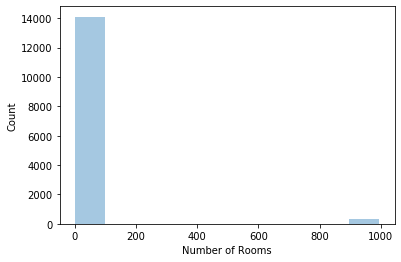

In [30]:
sns.distplot(num_set['ROMNUM'],bins = 10, norm_hist = False, kde = False).set(xlabel='Number of Rooms', ylabel = 'Count')

In [31]:
print(num_set['ROMNUM'])

SALDAT
2016-01-04     0
2016-01-04     7
2016-01-04     0
2016-01-04    10
2016-01-04    10
              ..
2018-03-21     6
2018-03-21     6
2018-03-21     6
2018-03-21    14
2018-03-21     7
Name: ROMNUM, Length: 14427, dtype: int64


In [32]:
num_set['ROMNUM'].describe()

count    14427.000000
mean        27.636099
std        141.747069
min          0.000000
25%          5.000000
50%          6.000000
75%          7.000000
max        995.000000
Name: ROMNUM, dtype: float64

Viewing the 'BEDNUM' variable.

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Number of Bedrooms')]

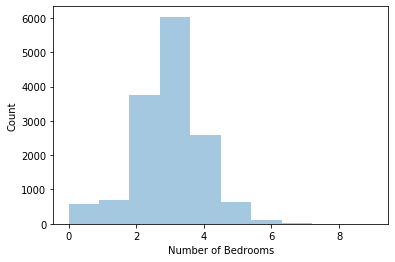

In [33]:
sns.distplot(num_set['BEDNUM'],bins = 10, norm_hist = False, kde = False).set(xlabel='Number of Bedrooms', ylabel = 'Count')

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Number of Bathrooms')]

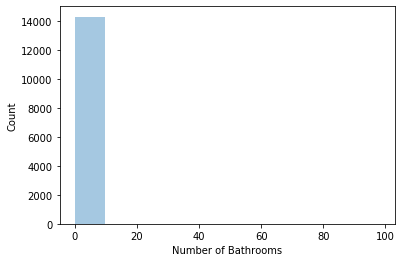

In [34]:
sns.distplot(num_set['BTHNUM'],bins = 10, norm_hist = False, kde = False).set(xlabel='Number of Bathrooms', ylabel = 'Count')

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Square Feet')]

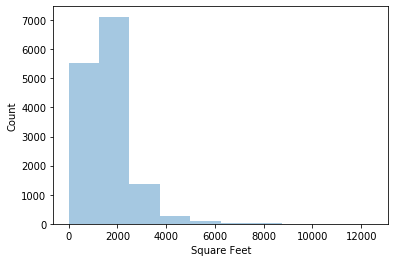

In [35]:
sns.distplot(num_set['SQRFT'],bins = 10, norm_hist = False, kde = False).set(xlabel='Square Feet', ylabel = 'Count')

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Lot Area')]

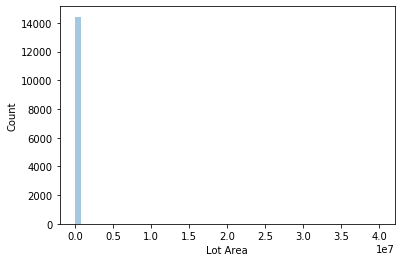

In [36]:
sns.distplot(num_set['LOTARA'], norm_hist = False, kde = False).set(xlabel='Lot Area', ylabel = 'Count')

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Stories')]

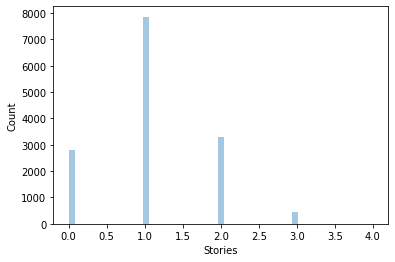

In [37]:
sns.distplot(num_set['STORIES'], norm_hist = False, kde = False).set(xlabel='Stories', ylabel = 'Count')

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Amount per square feet')]

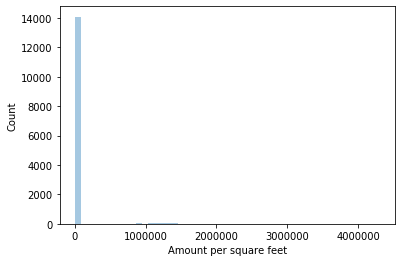

In [38]:
sns.distplot(num_set['AMNTSQRF'], norm_hist = False, kde = False).set(xlabel='Amount per square feet', ylabel = 'Count')

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Sale Amount')]

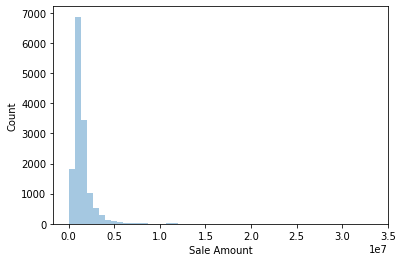

In [39]:
sns.distplot(data['SALAMT'], norm_hist = False, kde = False).set(xlabel='Sale Amount', ylabel = 'Count')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017DA24E8B08>,
      dtype=object)

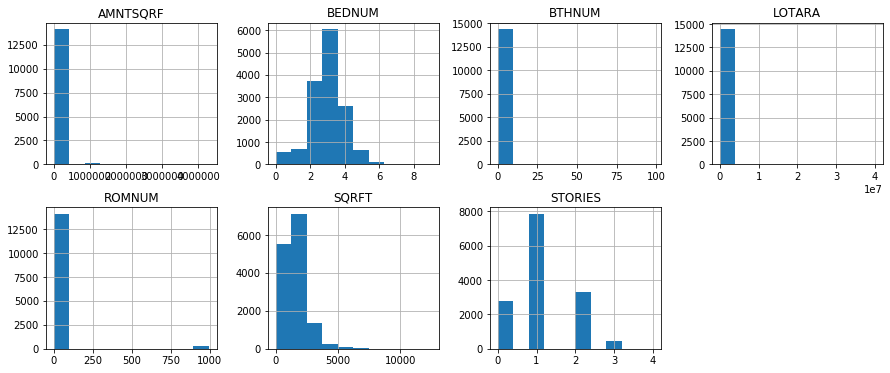

In [40]:
num_set.hist(bins = 10, figsize = (15,6), layout = (2,4))

In [41]:
cat_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14427 entries, 2016-01-04 to 2018-03-21
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   NBRCDE     14427 non-null  object
 1   QUALITY    11631 non-null  object
 2   VIEWQLTY   1165 non-null   object
 3   PATTERN    6272 non-null   object
 4   SITUSCITY  14251 non-null  object
dtypes: object(5)
memory usage: 676.3+ KB


In [42]:
cat_set.describe()

,NBRCDE,QUALITY,VIEWQLTY,PATTERN,SITUSCITY
count,14427,11631,1165,6272,14251
unique,363,39,6,1942,28
top,212,D0500,G,B,SAN MATEO
freq,903,3104,453,360,2361


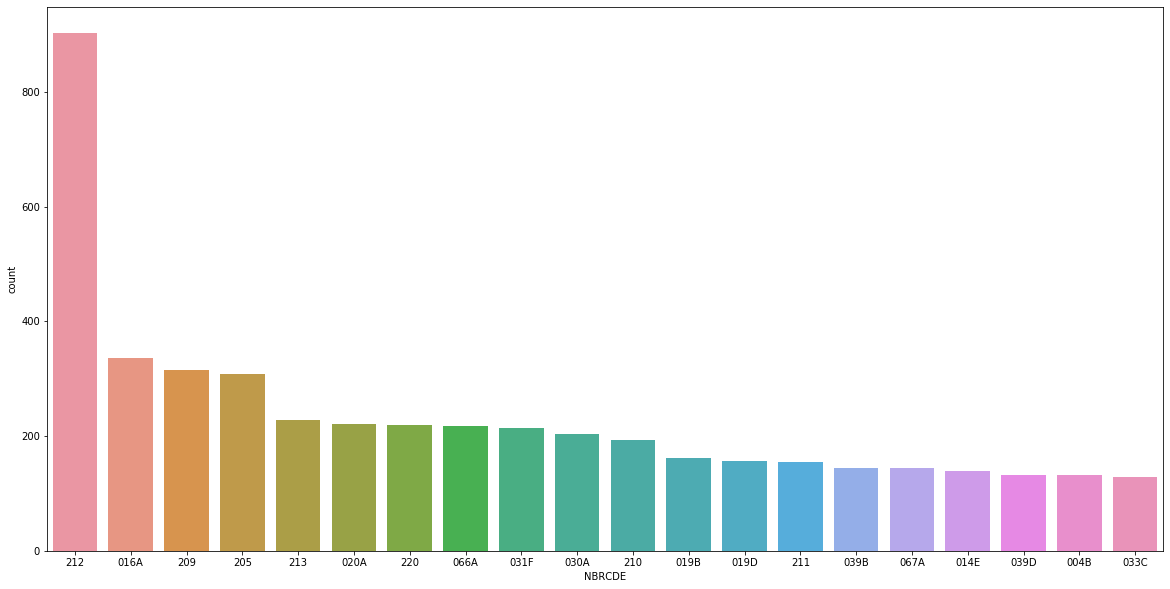

In [43]:
plt.figure(figsize = (20,10))
sns.countplot(data = cat_set, x = 'NBRCDE', order = cat_set.NBRCDE.value_counts().head(20).index)

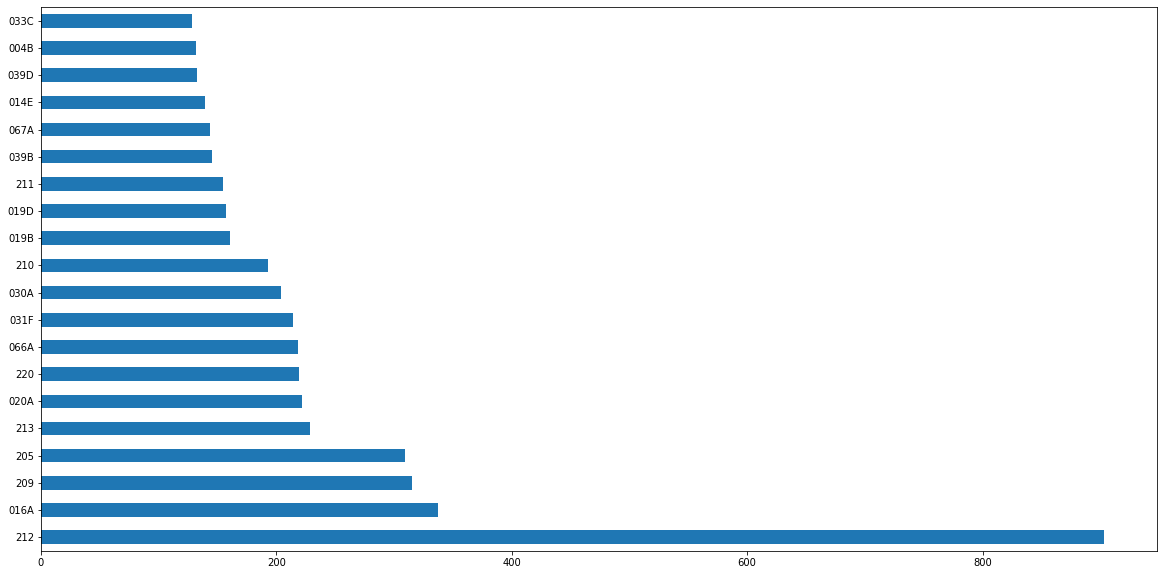

In [44]:
cat_set['NBRCDE'].value_counts().head(20).plot(kind = 'barh',figsize = (20,10))

In [45]:
cat_set['NBRCDE'].describe()

count     14427
unique      363
top         212
freq        903
Name: NBRCDE, dtype: object

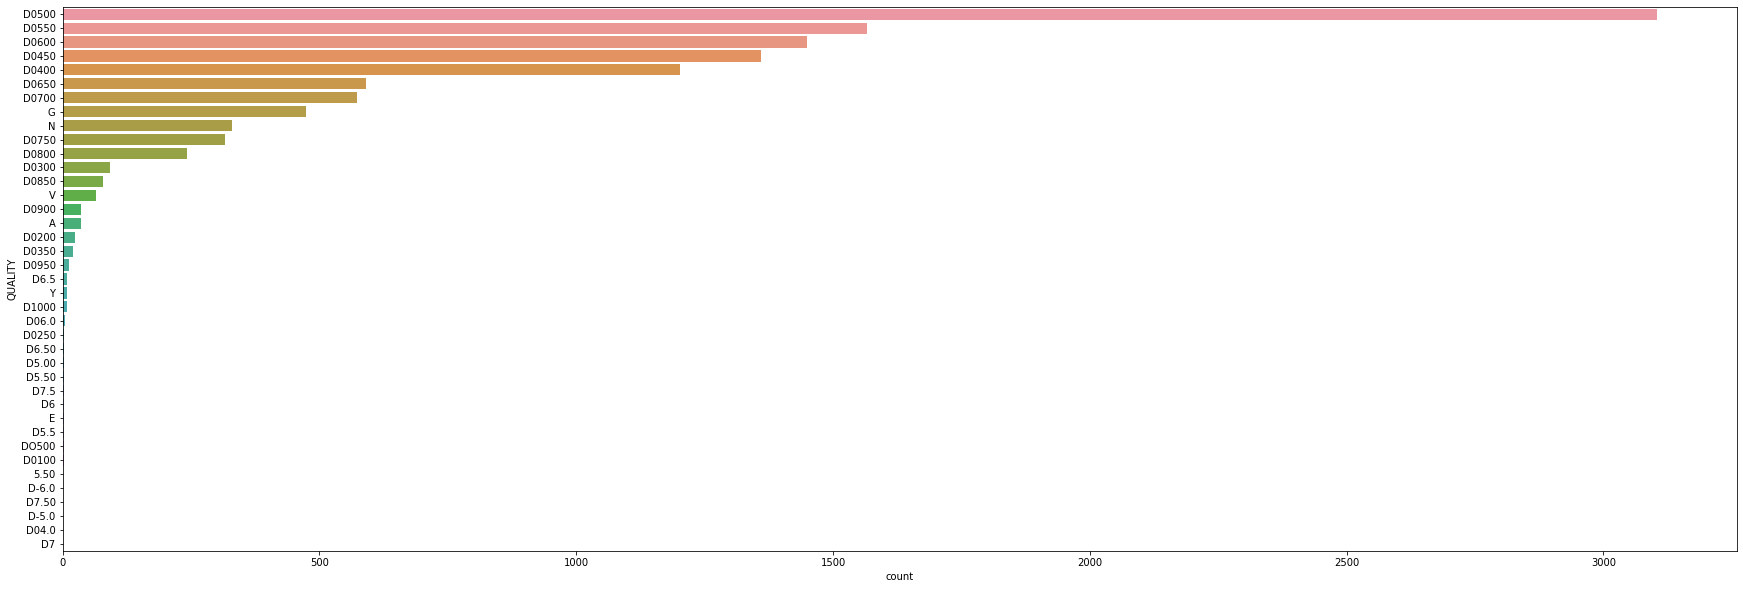

In [46]:
plt.figure(figsize = (30,10))
sns.countplot(data = cat_set, y = 'QUALITY', order = cat_set.QUALITY.value_counts().index)

In [47]:
cat_set['QUALITY'].describe()

count     11631
unique       39
top       D0500
freq       3104
Name: QUALITY, dtype: object

In [48]:
cat_set['QUALITY'].isna().sum()

2796

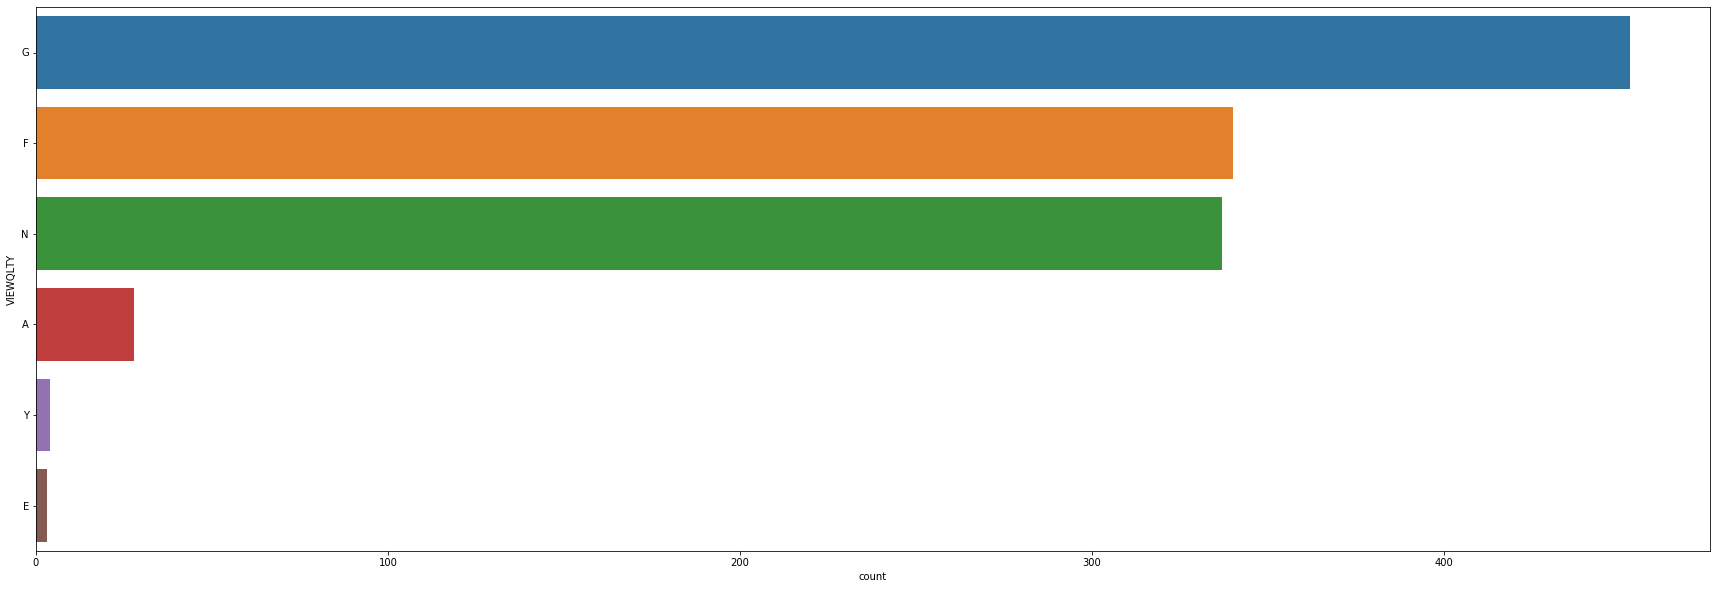

In [49]:
plt.figure(figsize = (30,10))
sns.countplot(data = cat_set, y = 'VIEWQLTY', order = cat_set.VIEWQLTY.value_counts().index)

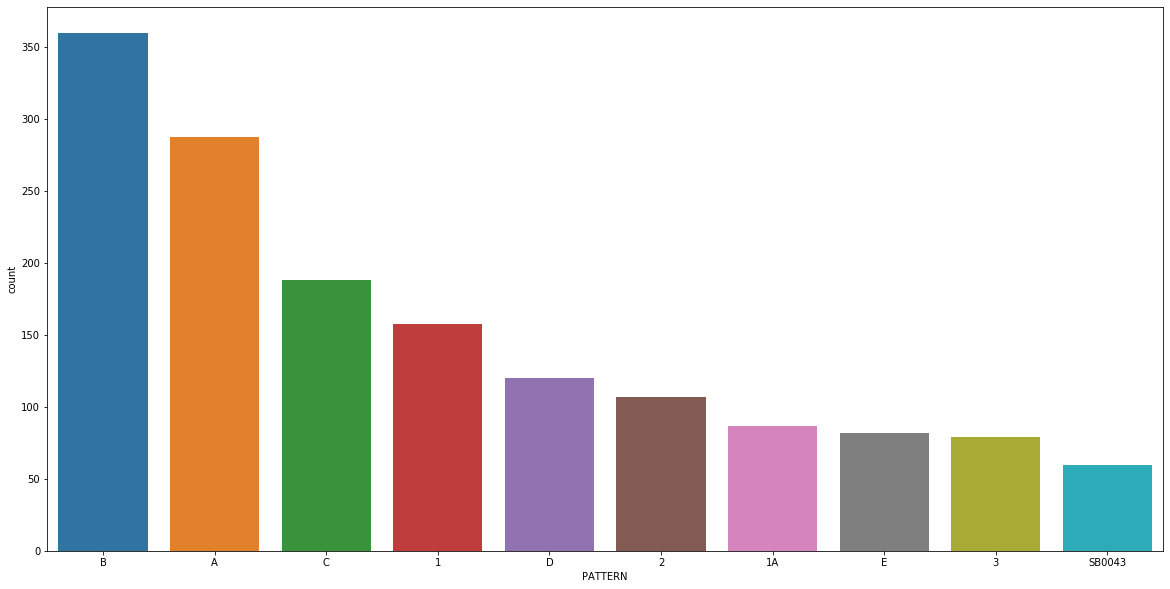

In [50]:
plt.figure(figsize = (20,10))
sns.countplot(data = cat_set, x = 'PATTERN', order = cat_set.PATTERN.value_counts().head(10).index)

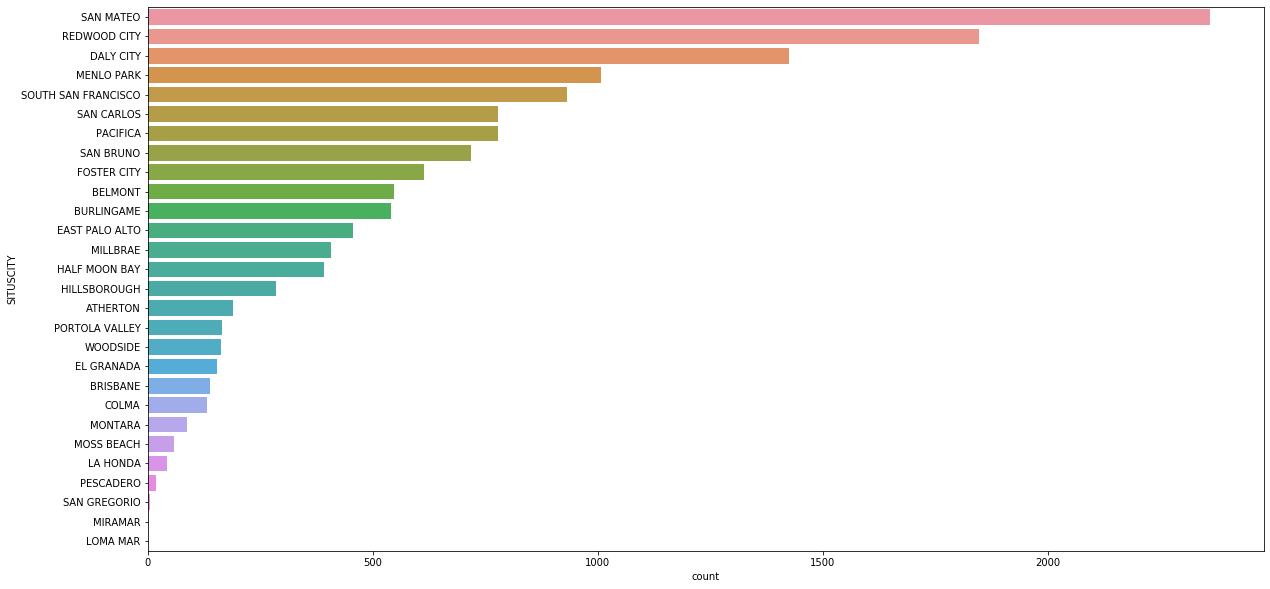

In [51]:
plt.figure(figsize = (20,10))
sns.countplot(data = cat_set, y = 'SITUSCITY', order = cat_set.SITUSCITY.value_counts().index)

In [52]:
data16.describe(include = "all")

,APN,DSTCDE,NBRCDE,PRCLID,CLACDE,SITUS,SALCDE,SALAMT,YERBLT,ROMNUM,...,QUALITY,STORIES,POOLYEAR,VIEWQLTY,PATTERN,AMNTSQRF,FINBASE,UNFINBASE,SITUSCITY,COMPLEX
count,6.565000e+03,6565.000000,6565,6565,6565.000000,6464,6565,6.565000e+03,6565.000000,6565.000000,...,5236,6565.000000,6565.000000,521,2866,6.565000e+03,6565.000000,6565.000000,6484,1257
unique,NaN,NaN,333,6467,NaN,6283,1,NaN,NaN,NaN,...,38,NaN,NaN,5,1181,NaN,NaN,NaN,27,318
top,NaN,NaN,212,038 212 020,NaN,2140 SANTA CRUZ AVE,CIO-SALE,NaN,NaN,NaN,...,D0500,NaN,NaN,G,B,NaN,NaN,NaN,SAN MATEO,SHELTER CREEK
freq,NaN,NaN,388,2,NaN,10,6565,NaN,NaN,NaN,...,1425,NaN,NaN,198,167,NaN,NaN,NaN,1062,54
mean,5.741705e+07,1.663214,NaN,NaN,21.613861,NaN,NaN,1.391795e+06,1859.198172,26.782788,...,NaN,1.104950,246.047982,NaN,NaN,2.624484e+04,48.210206,137.333130,NaN,NaN
std,3.554280e+07,1.239604,NaN,NaN,39.144796,NaN,NaN,1.444245e+06,444.485694,139.247849,...,NaN,0.696764,1166.481217,NaN,NaN,1.826707e+05,245.010961,280.069429,NaN,NaN
min,2.024080e+06,1.000000,NaN,NaN,0.000000,NaN,NaN,1.000000e+03,0.000000,0.000000,...,NaN,0.000000,0.000000,NaN,NaN,0.000000e+00,0.000000,0.000000,NaN,NaN
25%,2.813325e+07,1.000000,NaN,NaN,1.000000,NaN,NaN,7.950000e+05,1948.000000,5.000000,...,NaN,1.000000,0.000000,NaN,NaN,6.071400e+02,0.000000,0.000000,NaN,NaN
50%,5.307507e+07,1.000000,NaN,NaN,1.000000,NaN,NaN,1.065000e+06,1959.000000,6.000000,...,NaN,1.000000,0.000000,NaN,NaN,7.491200e+02,0.000000,0.000000,NaN,NaN
75%,9.145409e+07,2.000000,NaN,NaN,1.000000,NaN,NaN,1.560000e+06,1979.000000,7.000000,...,NaN,2.000000,0.000000,NaN,NaN,9.434100e+02,0.000000,0.000000,NaN,NaN


In [53]:
#Filtering numerical and categorical dataset for 2016
num_set_16 = data16[['ROMNUM','BEDNUM','BTHNUM','SQRFT','LOTARA','STORIES','AMNTSQRF']]
cat_set_16 = data16[['NBRCDE','QUALITY','VIEWQLTY','PATTERN','SITUSCITY']]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017DA189F448>,
      dtype=object)

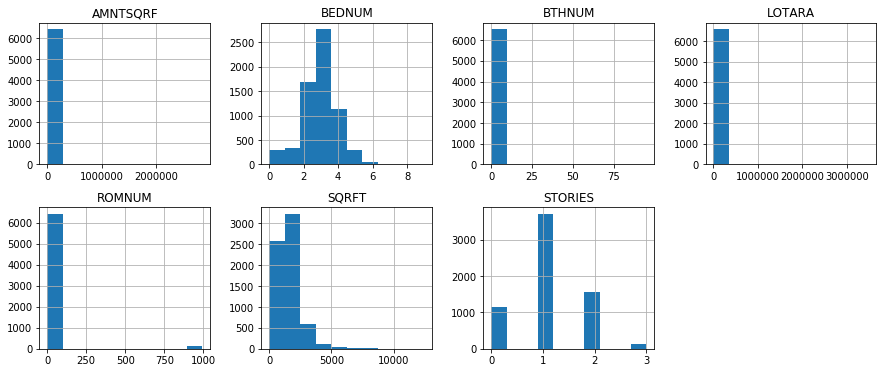

In [54]:
num_set_16.hist(bins = 10, figsize = (15,6), layout = (2,4))

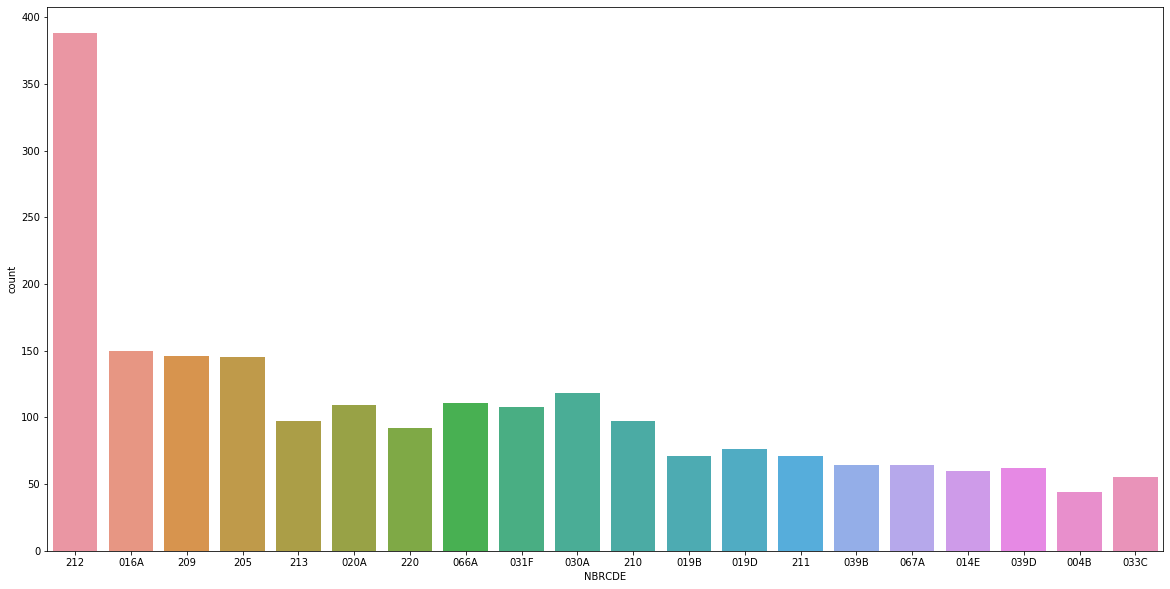

In [55]:
plt.figure(figsize = (20,10))
sns.countplot(data = cat_set_16, x = 'NBRCDE', order = cat_set.NBRCDE.value_counts().head(20).index)

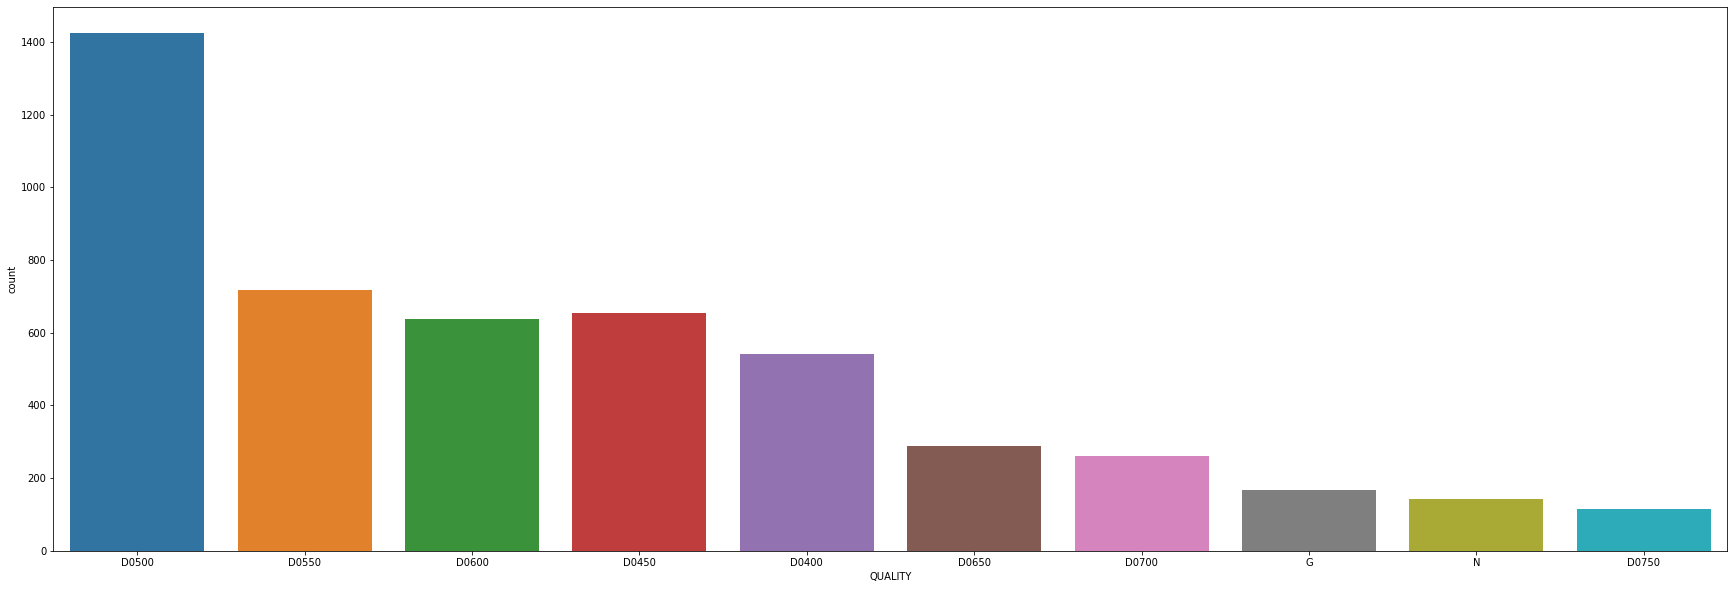

In [56]:
plt.figure(figsize = (30,10))
sns.countplot(data = cat_set_16, x = 'QUALITY', order = cat_set.QUALITY.value_counts().head(10).index)

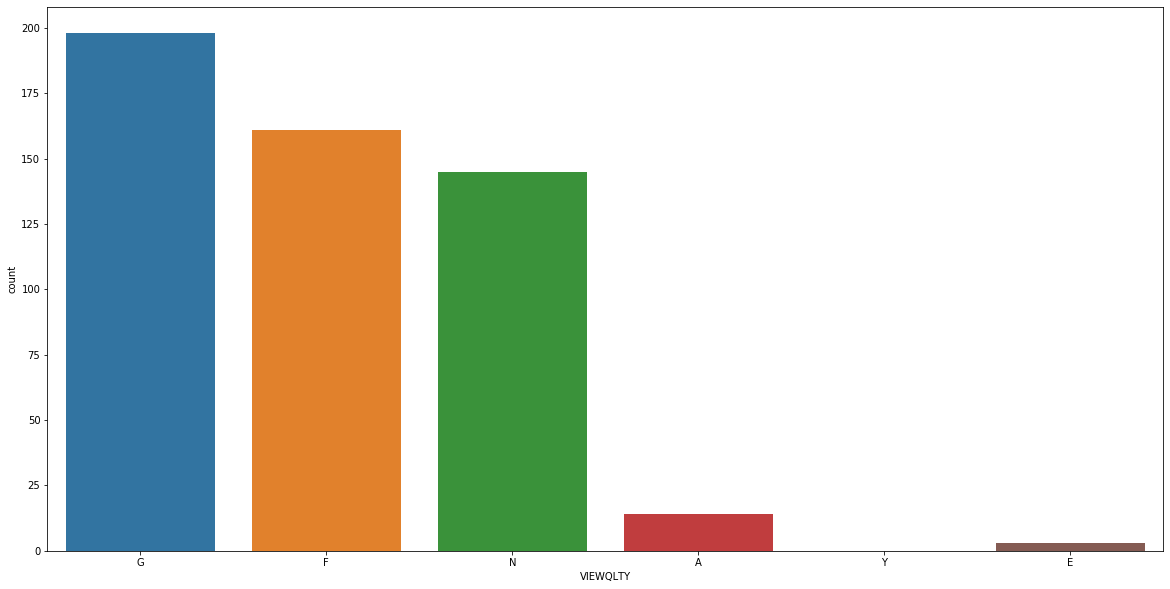

In [57]:
plt.figure(figsize = (20,10))
sns.countplot(data = cat_set_16, x = 'VIEWQLTY', order = cat_set.VIEWQLTY.value_counts().index)

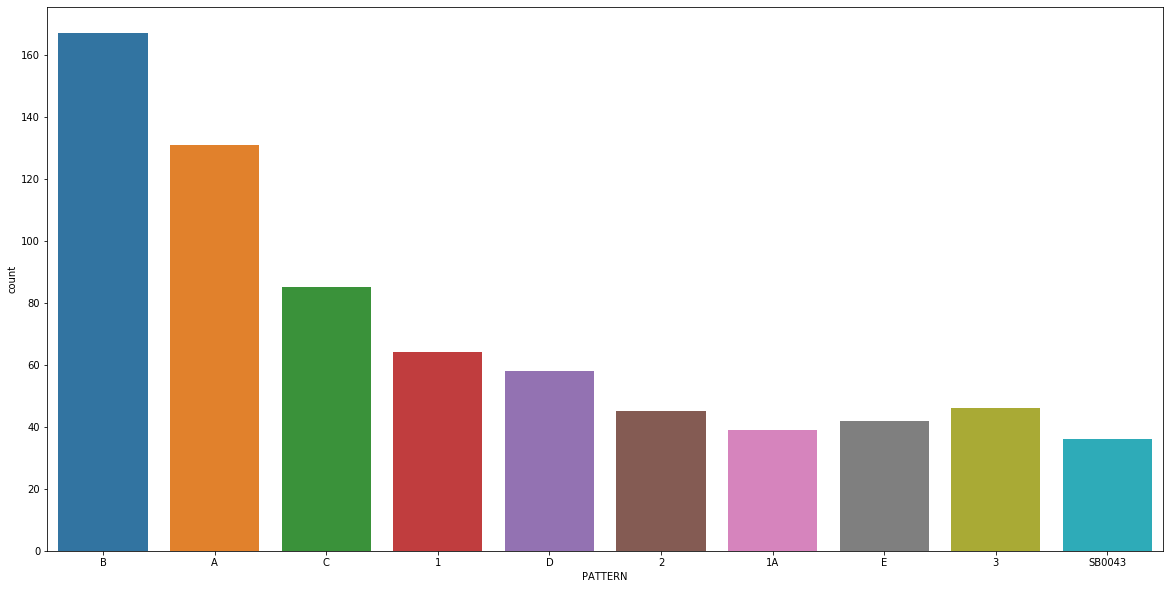

In [58]:
plt.figure(figsize = (20,10))
sns.countplot(data = cat_set_16, x = 'PATTERN', order = cat_set.PATTERN.value_counts().head(10).index)

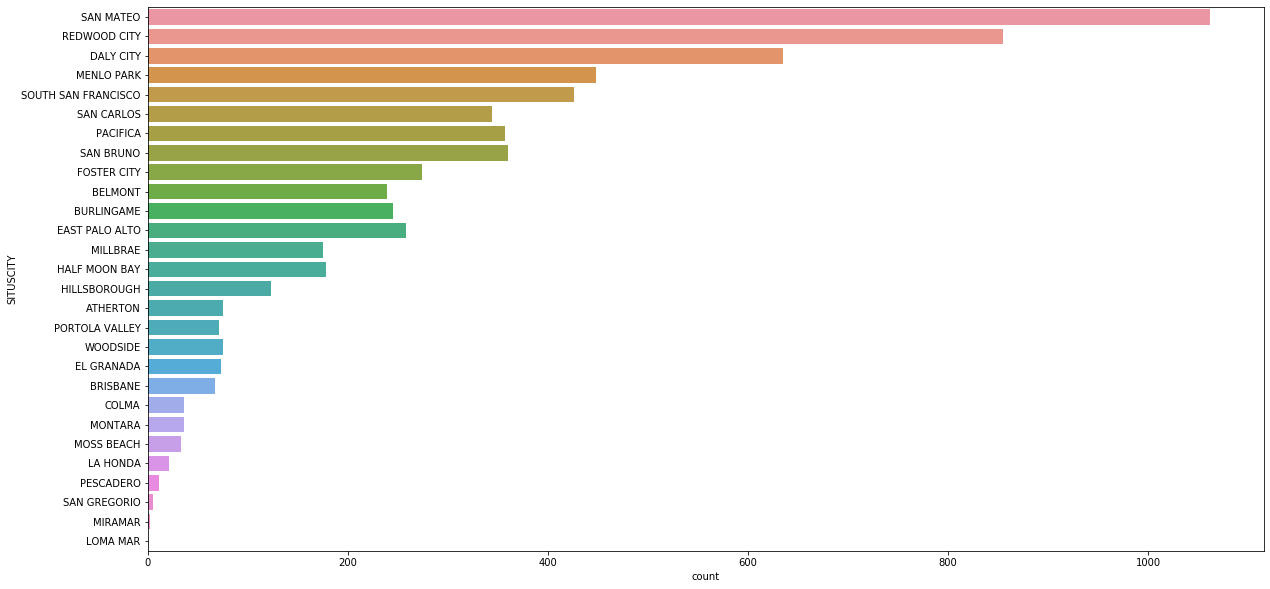

In [59]:
plt.figure(figsize = (20,10))
sns.countplot(data = cat_set_16, y = 'SITUSCITY', order = cat_set.SITUSCITY.value_counts().index)

In [60]:
#Filtering numerical and categorical dataset for 2017
num_set_17 = data17[['ROMNUM','BEDNUM','BTHNUM','SQRFT','LOTARA','STORIES','AMNTSQRF']]
cat_set_17 = data17[['NBRCDE','QUALITY','VIEWQLTY','PATTERN','SITUSCITY']]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017DA1B6D5C8>,
      dtype=object)

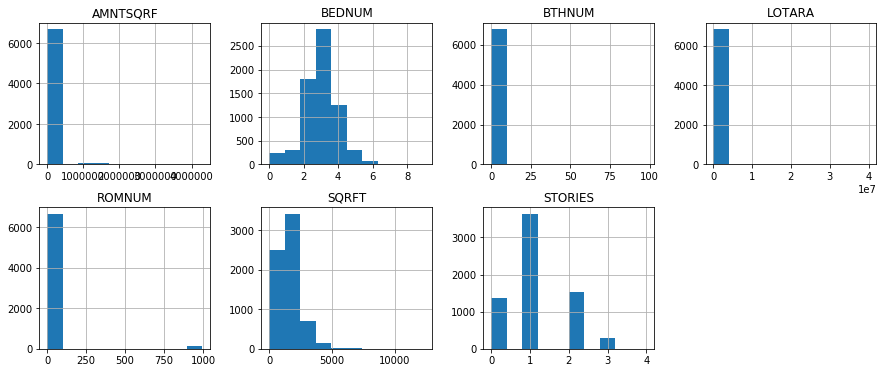

In [61]:
num_set_17.hist(bins = 10, figsize = (15,6), layout = (2,4))

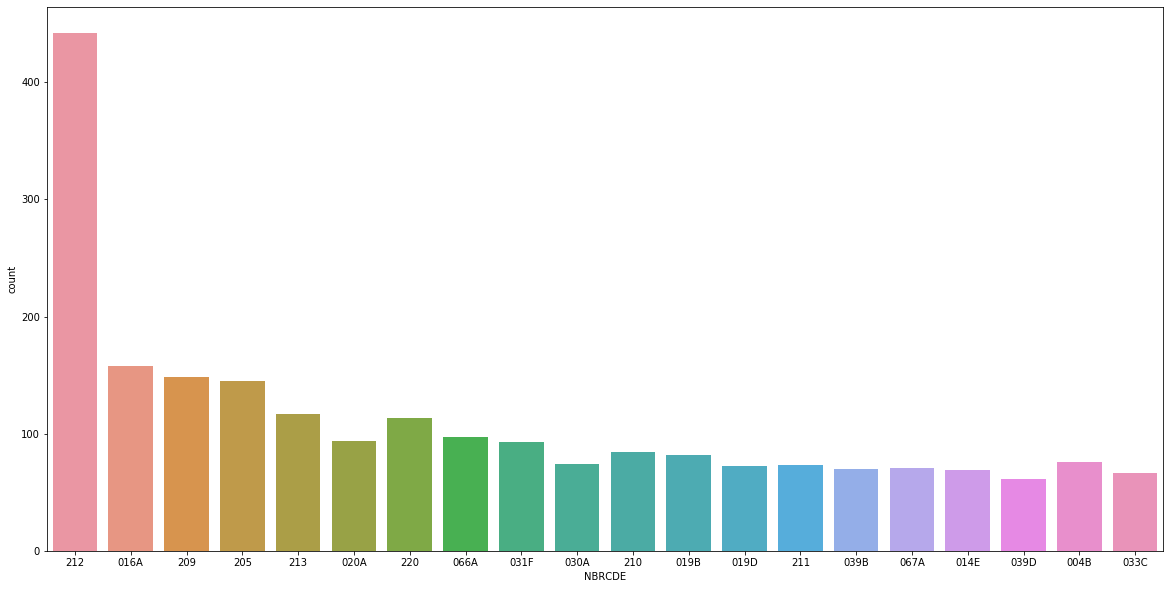

In [62]:
plt.figure(figsize = (20,10))
sns.countplot(data = cat_set_17, x = 'NBRCDE', order = cat_set.NBRCDE.value_counts().head(20).index)

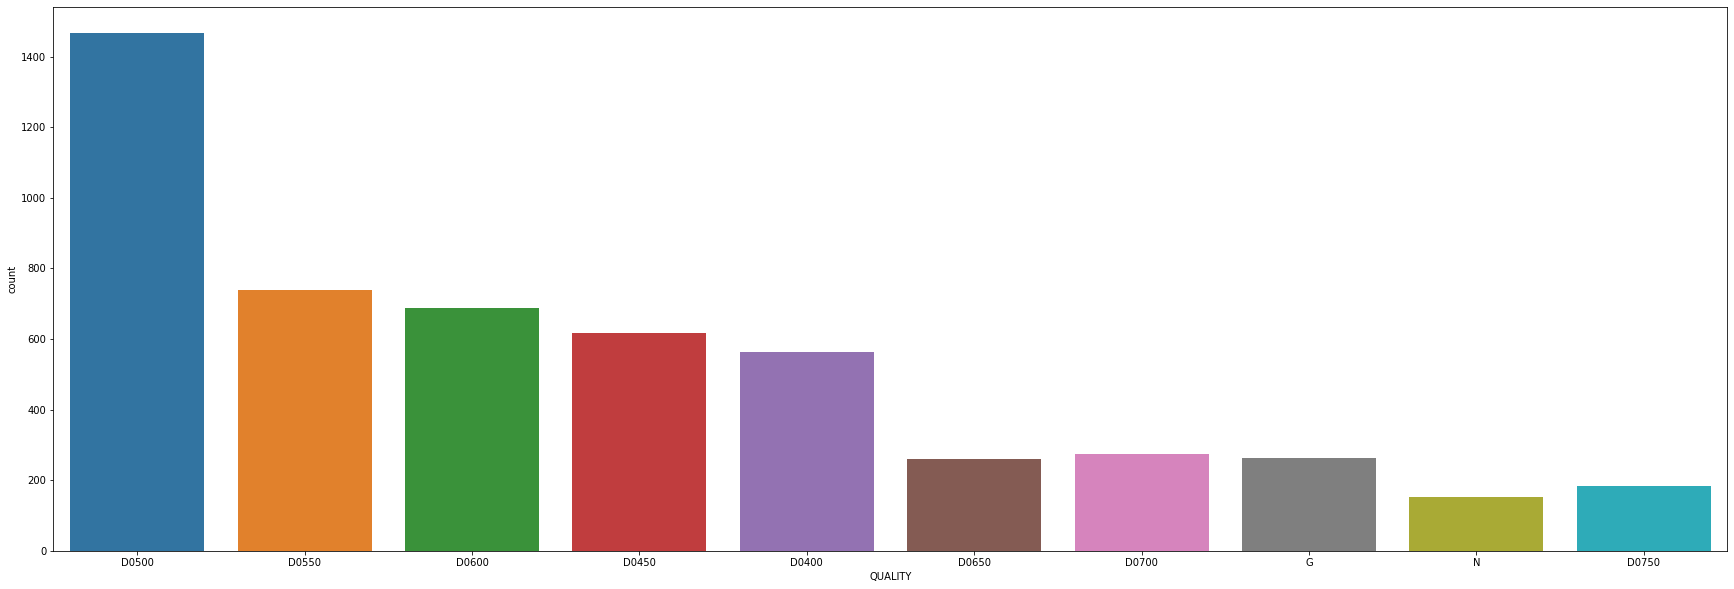

In [63]:
plt.figure(figsize = (30,10))
sns.countplot(data = cat_set_17, x = 'QUALITY', order = cat_set.QUALITY.value_counts().head(10).index)

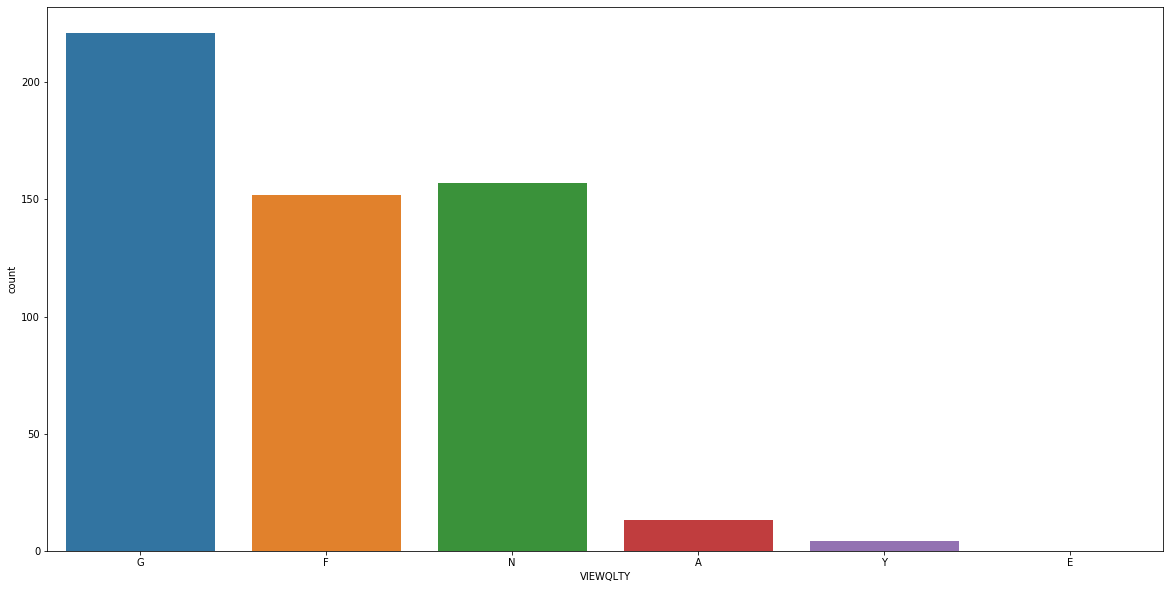

In [64]:
plt.figure(figsize = (20,10))
sns.countplot(data = cat_set_17, x = 'VIEWQLTY', order = cat_set.VIEWQLTY.value_counts().index)

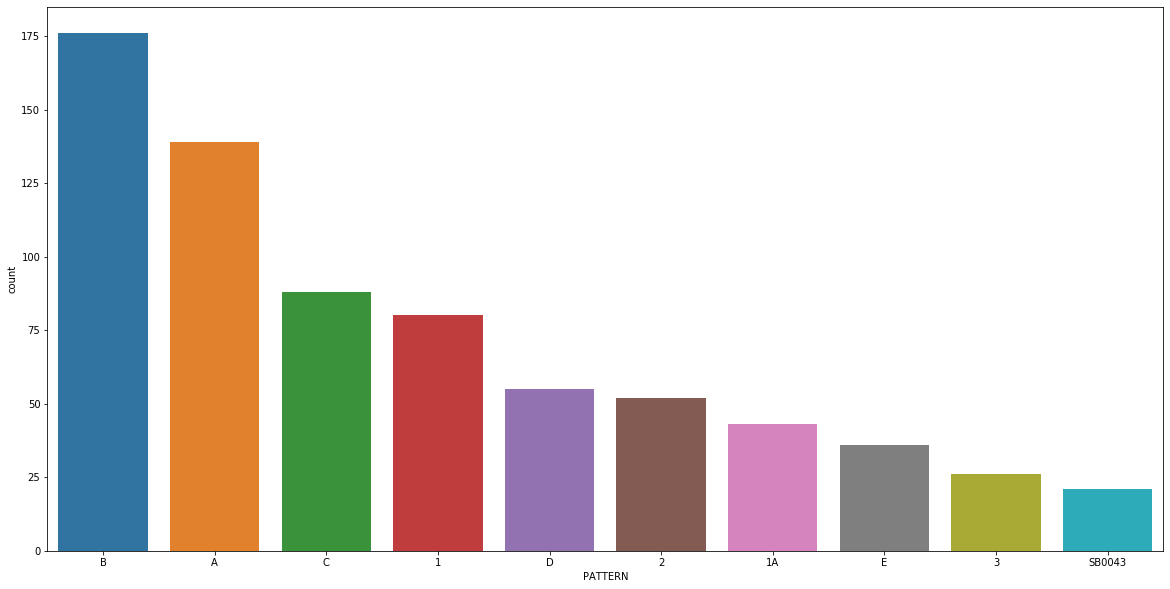

In [65]:
plt.figure(figsize = (20,10))
sns.countplot(data = cat_set_17, x = 'PATTERN', order = cat_set.PATTERN.value_counts().head(10).index)

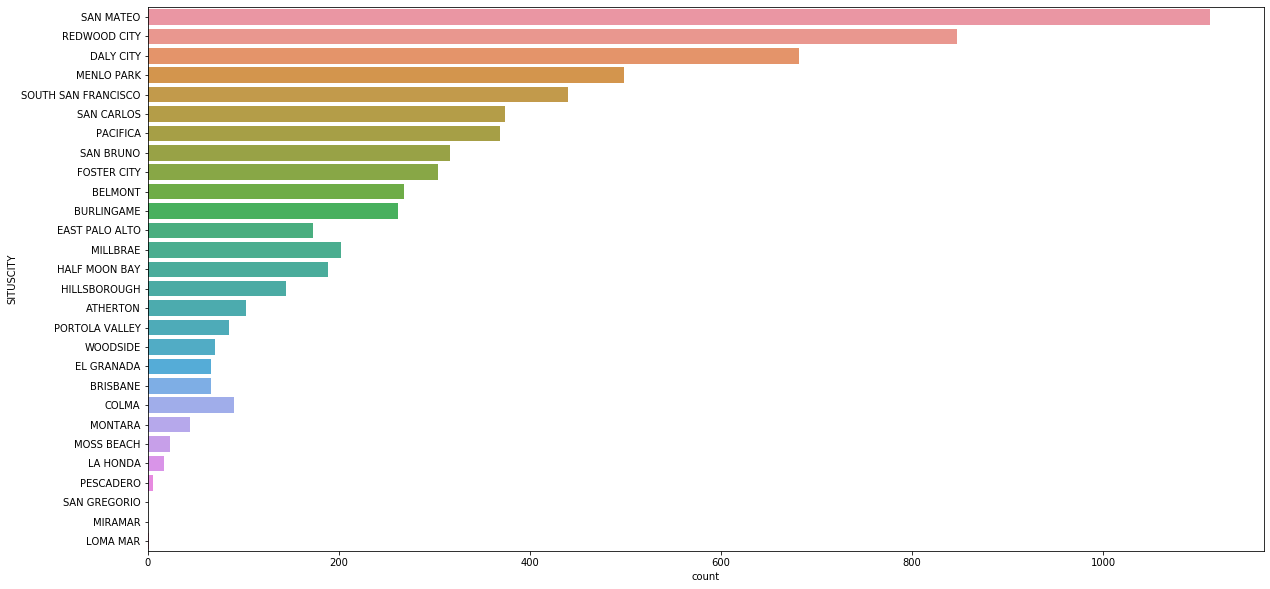

In [66]:
plt.figure(figsize = (20,10))
sns.countplot(data = cat_set_17, y = 'SITUSCITY', order = cat_set.SITUSCITY.value_counts().index)

In [67]:
#Filtering numerical and categorical dataset for 2018
num_set_18 = data18[['ROMNUM','BEDNUM','BTHNUM','SQRFT','LOTARA','STORIES','AMNTSQRF']]
cat_set_18 = data18[['NBRCDE','QUALITY','VIEWQLTY','PATTERN','SITUSCITY']]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017DA72CEDC8>,
      dtype=object)

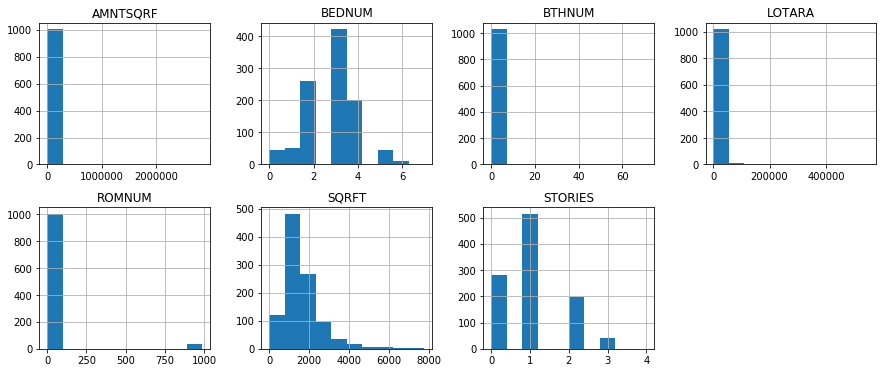

In [68]:
num_set_18.hist(bins = 10, figsize = (15,6), layout = (2,4))

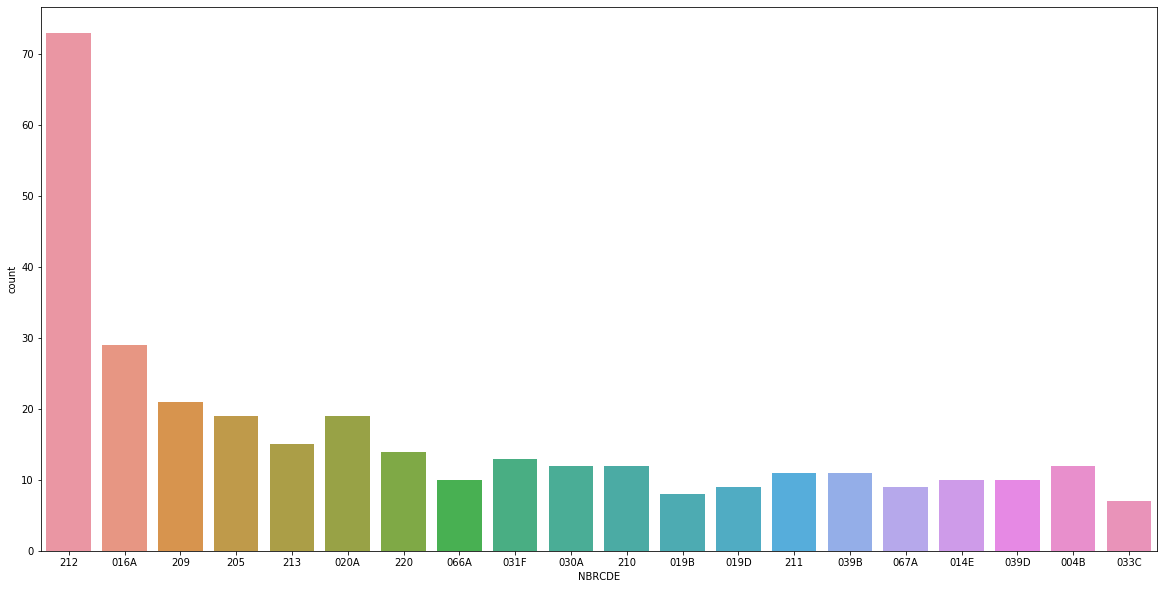

In [69]:
plt.figure(figsize = (20,10))
sns.countplot(data = cat_set_18, x = 'NBRCDE', order = cat_set.NBRCDE.value_counts().head(20).index)

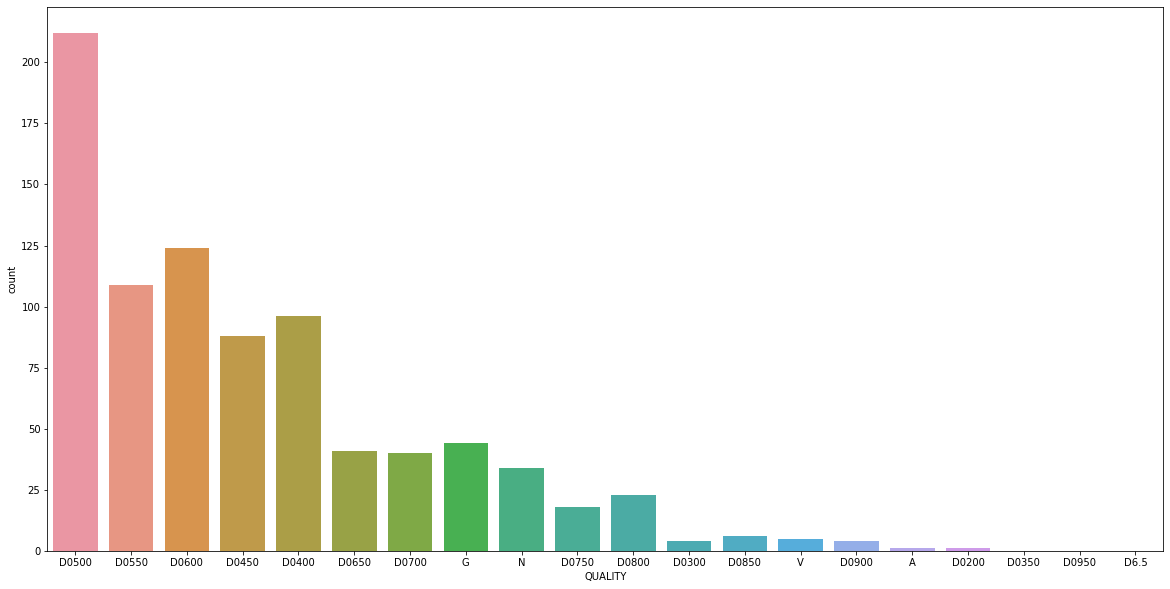

In [70]:
plt.figure(figsize = (20,10))
sns.countplot(data = cat_set_18, x = 'QUALITY', order = cat_set.QUALITY.value_counts().head(20).index)

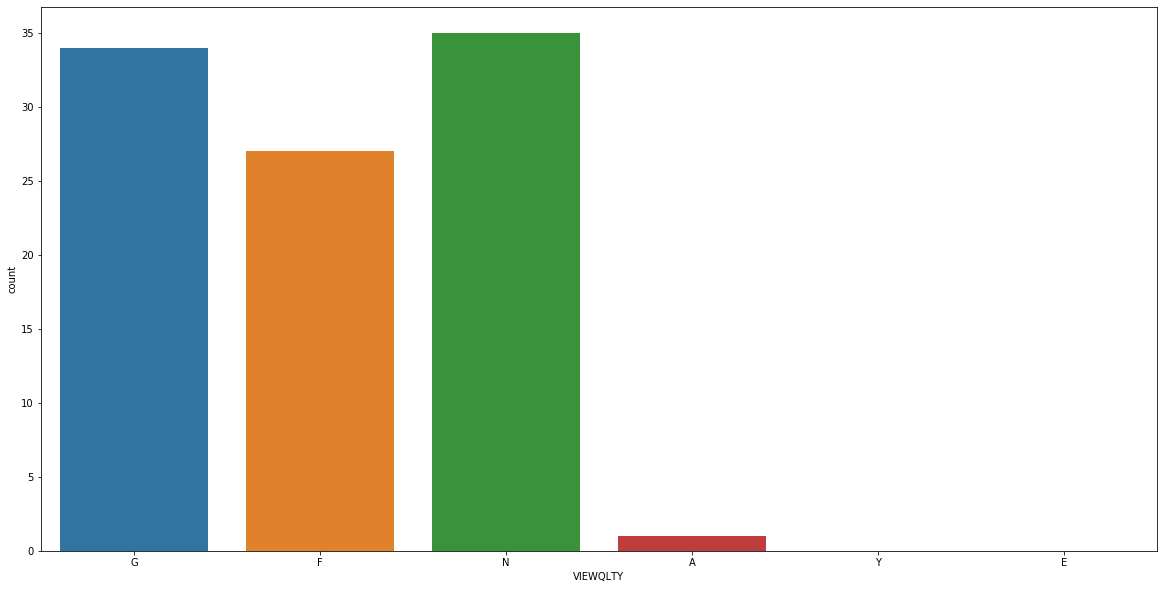

In [71]:
plt.figure(figsize = (20,10))
sns.countplot(data = cat_set_18, x = 'VIEWQLTY', order = cat_set.VIEWQLTY.value_counts().index)

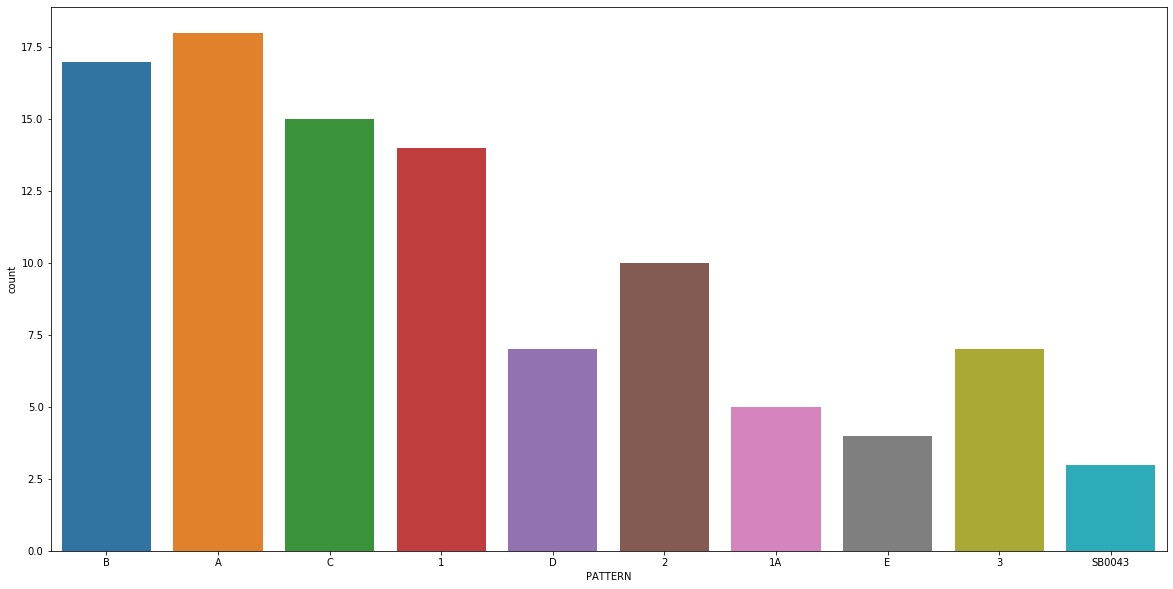

In [72]:
plt.figure(figsize = (20,10))
sns.countplot(data = cat_set_18, x = 'PATTERN', order = cat_set.PATTERN.value_counts().head(10).index)

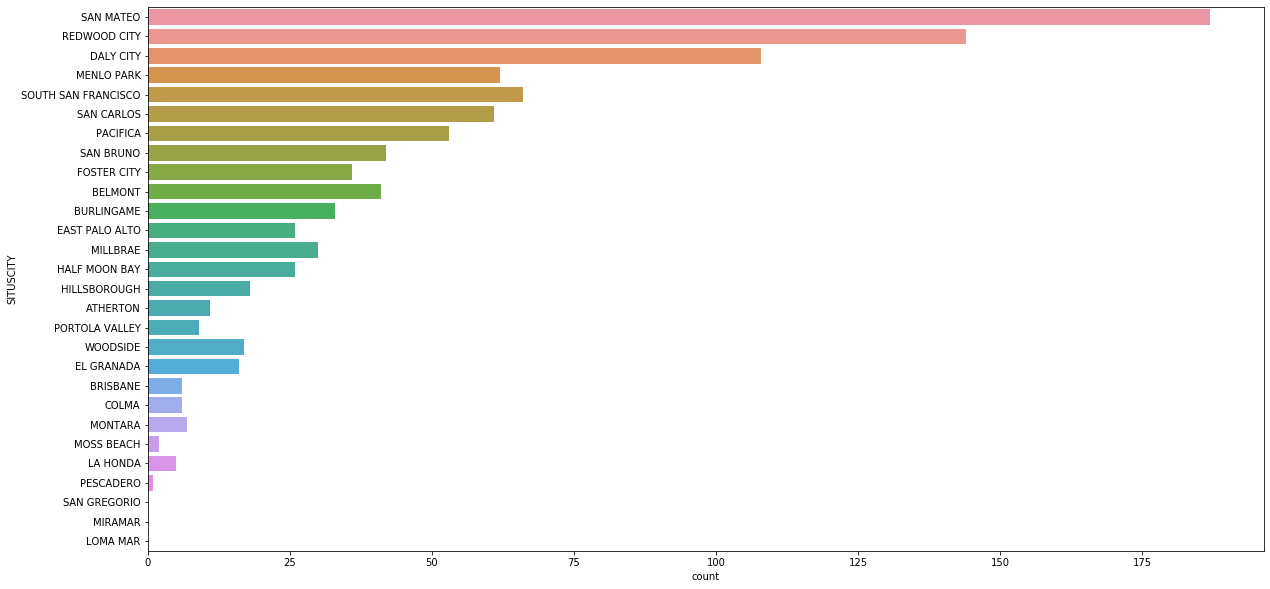

In [73]:
plt.figure(figsize = (20,10))
sns.countplot(data = cat_set_18, y = 'SITUSCITY', order = cat_set.SITUSCITY.value_counts().index)

## Analyzing relationships for Numerical variables

### ROMNUM and SALAMT

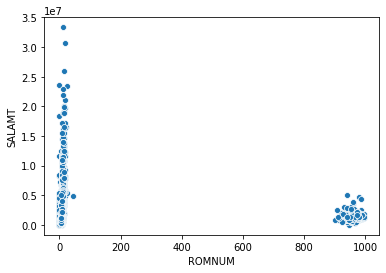

In [74]:
#Analyzing relationships between numerical variable
sns.scatterplot(x = data['ROMNUM'], y = data['SALAMT'])

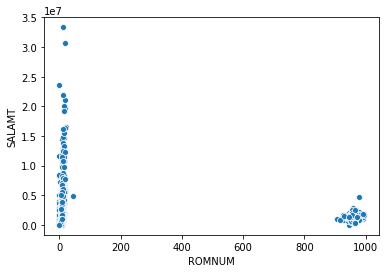

In [75]:
#Analyzing relationships between numerical variable
sns.scatterplot(x = data16['ROMNUM'], y = data16['SALAMT'])

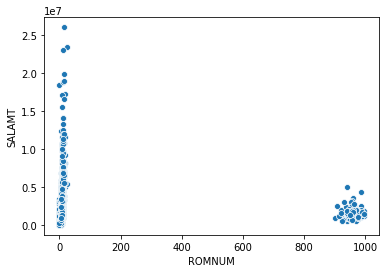

In [76]:
#Analyzing relationships between numerical variable
sns.scatterplot(x = data17['ROMNUM'], y = data17['SALAMT'])

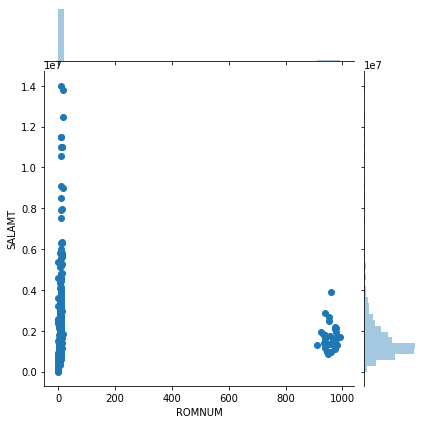

In [77]:
#Analyzing relationships between numerical variable
sns.jointplot(x = data18['ROMNUM'], y = data18['SALAMT'])

### BEDNUM AND SALAMT

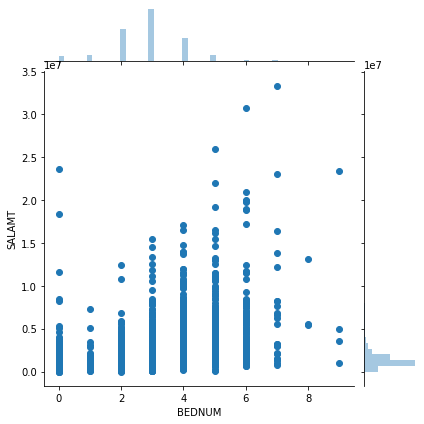

In [78]:
sns.jointplot(x = data['BEDNUM'], y = data['SALAMT'])

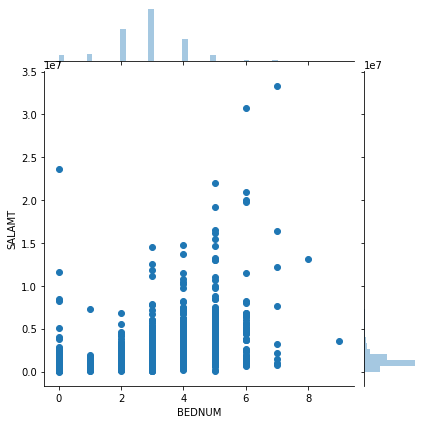

In [79]:
sns.jointplot(x = data16['BEDNUM'], y = data16['SALAMT'])

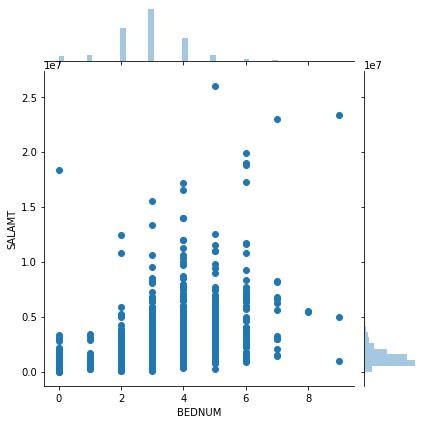

In [80]:
sns.jointplot(x = data17['BEDNUM'], y = data17['SALAMT'])

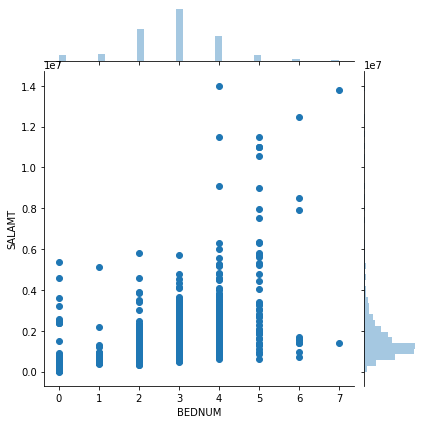

In [81]:
sns.jointplot(x = data18['BEDNUM'], y = data18['SALAMT'])

### BTHNUM and SALAMT

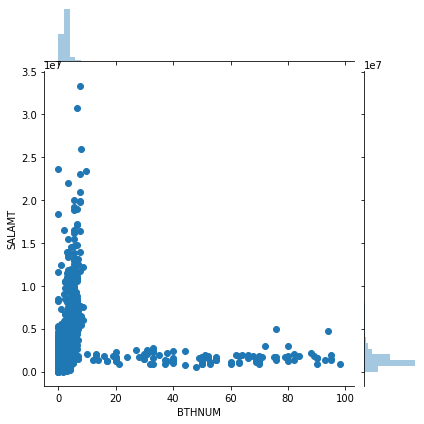

In [82]:
sns.jointplot(x = data['BTHNUM'], y = data['SALAMT'])

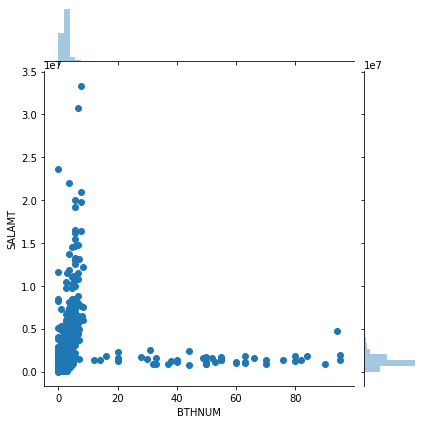

In [83]:
sns.jointplot(x = data16['BTHNUM'], y = data16['SALAMT'])

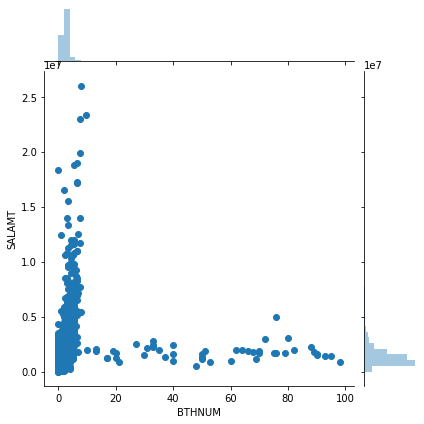

In [84]:
sns.jointplot(x = data17['BTHNUM'], y = data17['SALAMT'])

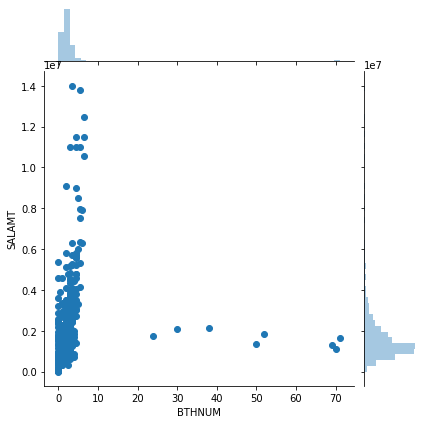

In [85]:
sns.jointplot(x = data18['BTHNUM'], y = data18['SALAMT'])

### SQRFT and SALAMT

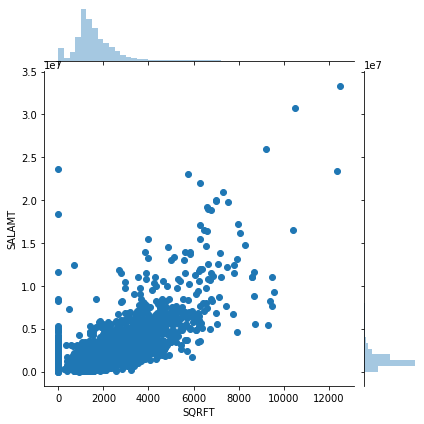

In [86]:
sns.jointplot(x = data['SQRFT'], y = data['SALAMT'])

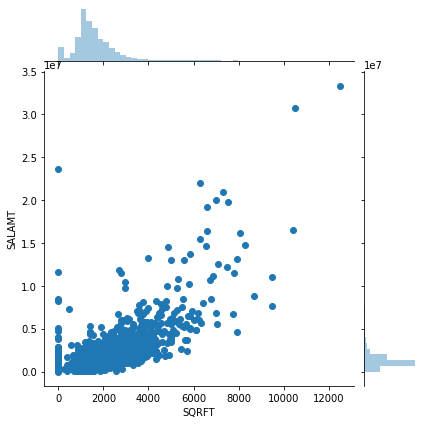

In [87]:
sns.jointplot(x = data16['SQRFT'], y = data16['SALAMT'])

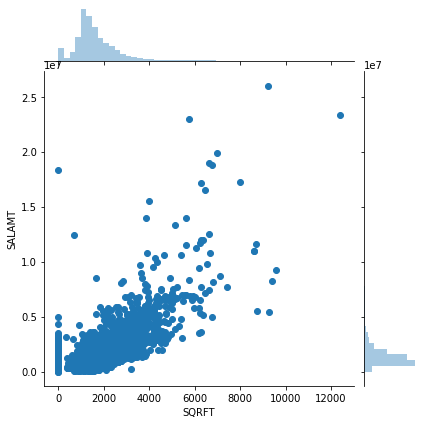

In [88]:
sns.jointplot(x = data17['SQRFT'], y = data17['SALAMT'])

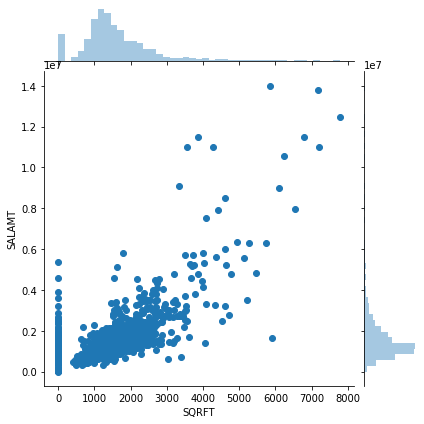

In [89]:
sns.jointplot(x = data18['SQRFT'], y = data18['SALAMT'])

### LOTARA and SALAMT

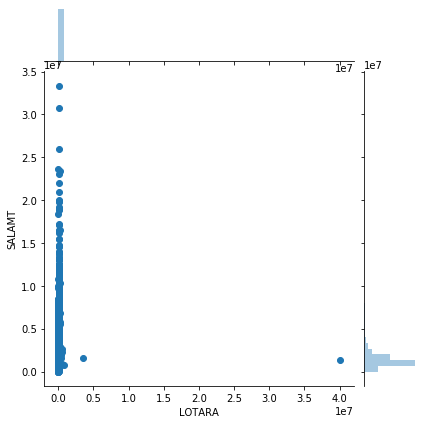

In [90]:
sns.jointplot(x = data['LOTARA'], y = data['SALAMT'])

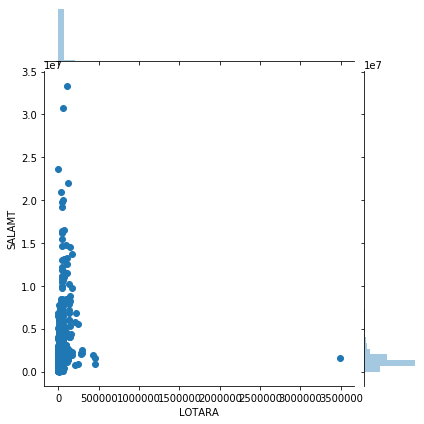

In [91]:
sns.jointplot(x = data16['LOTARA'], y = data16['SALAMT'])

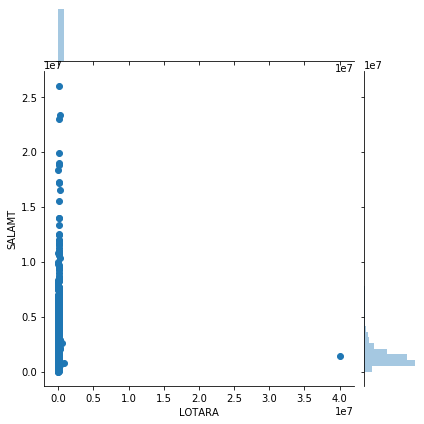

In [92]:
sns.jointplot(x = data17['LOTARA'], y = data17['SALAMT'])

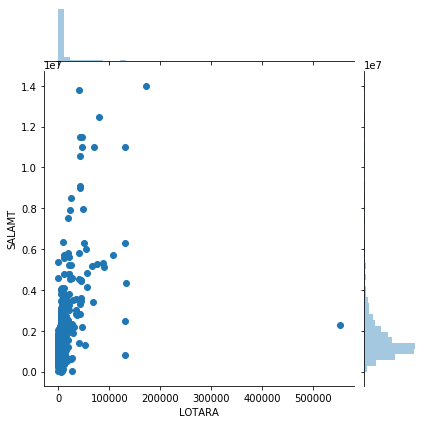

In [93]:
sns.jointplot(x = data18['LOTARA'], y = data18['SALAMT'])

### AMNTSQRF and SALAMT

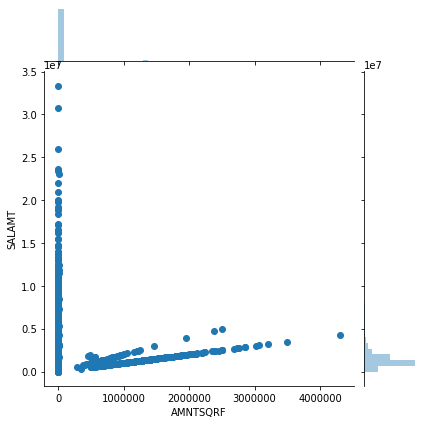

In [94]:
#for the dataset
sns.jointplot(x = data['AMNTSQRF'], y = data['SALAMT'])

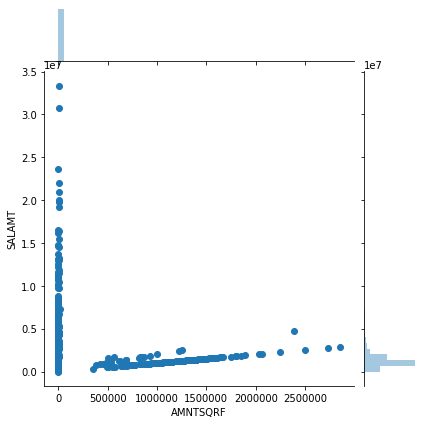

In [95]:
#for 2016 
sns.jointplot(x = data16['AMNTSQRF'], y = data16['SALAMT'])

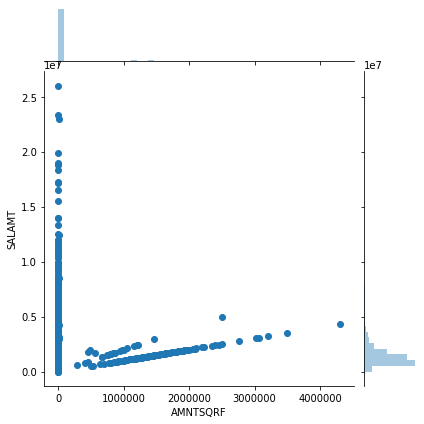

In [96]:
#for 2017
sns.jointplot(x = data17['AMNTSQRF'], y = data17['SALAMT'])

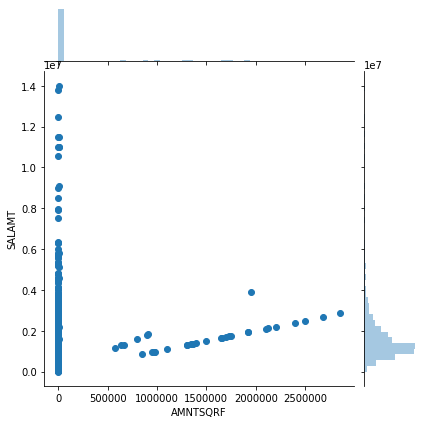

In [97]:
sns.jointplot(x = data18['AMNTSQRF'], y = data18['SALAMT'])

### Exploratory

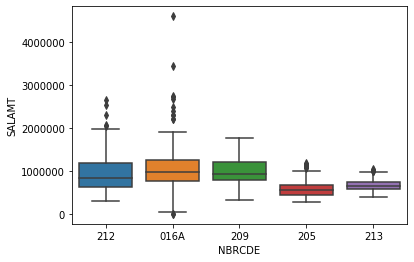

In [98]:
sns.boxplot(x = data['NBRCDE'], y = data['SALAMT'], order = cat_set.NBRCDE.value_counts().head(5).index)

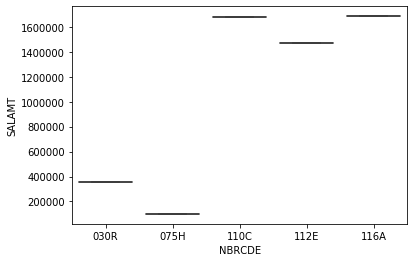

In [99]:
sns.boxplot(x = data['NBRCDE'], y = data['SALAMT'], order = cat_set.NBRCDE.value_counts().tail(5).index)

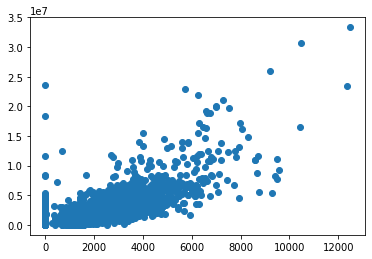

In [100]:
x = data['SQRFT']
y = data['SALAMT']
plt.scatter(x,y)

#### Turning Categorical Variables into quantitative variables

In [101]:
pd.get_dummies(data['NBRCDE']).info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14427 entries, 2016-01-04 to 2018-03-21
Columns: 363 entries, 000 to 287
dtypes: uint8(363)
memory usage: 5.4 MB


In [102]:
print(data['NBRCDE'])

SALDAT
2016-01-04    016A
2016-01-04    039D
2016-01-04     091
2016-01-04    039B
2016-01-04    039D
              ... 
2018-03-21    005D
2018-03-21    013A
2018-03-21    004G
2018-03-21    028F
2018-03-21    067A
Name: NBRCDE, Length: 14427, dtype: object


In [103]:
sample_NBRCDE = pd.get_dummies(data['NBRCDE'])

In [104]:
sample_NBRCDE.head()

,000,001B,001C,001D,001E,003A,003B,003C,003D,003E,...,216,217,218,218R,220,221,221R,261,273,287
SALDAT,,,,,,,,,,,,,,,,,,,,,
2016-01-04,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-01-04,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-01-04,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-01-04,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-01-04,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [105]:
sample_grp = data.groupby('SITUSCITY').groups

In [106]:
print(sample_grp).head(5)

{'ATHERTON': DatetimeIndex(['2016-01-15', '2016-02-02', '2016-02-05', '2016-02-08',
               '2016-02-19', '2016-03-04', '2016-03-11', '2016-03-11',
               '2016-03-15', '2016-03-17',
               ...
               '2018-01-19', '2018-01-25', '2018-02-06', '2018-02-12',
               '2018-02-13', '2018-02-16', '2018-02-27', '2018-03-05',
               '2018-03-09', '2018-03-21'],
              dtype='datetime64[ns]', name='SALDAT', length=189, freq=None), 'BELMONT': DatetimeIndex(['2016-01-04', '2016-01-05', '2016-01-07', '2016-01-13',
               '2016-01-14', '2016-01-15', '2016-01-15', '2016-01-20',
               '2016-01-21', '2016-01-22',
               ...
               '2018-03-08', '2018-03-12', '2018-03-13', '2018-03-14',
               '2018-03-15', '2018-03-16', '2018-03-19', '2018-03-20',
               '2018-03-20', '2018-03-21'],
              dtype='datetime64[ns]', name='SALDAT', length=548, freq=None), 'BRISBANE': DatetimeIndex(['2016-01-08', '

              dtype='datetime64[ns]', name='SALDAT', length=163, freq=None)}


AttributeError: 'NoneType' object has no attribute 'head'

### Checking for Correlation

In [ ]:
sns.regplot(x = data['ROMNUM'], y = data['SALAMT'])

In [ ]:
sns.regplot(x = data['BEDNUM'], y = data['SALAMT'])

In [ ]:
sns.regplot(x = data['BTHNUM'], y = data['SALAMT'])

In [ ]:
sns.regplot(x = data['SQRFT'], y = data['SALAMT'])
plt.ylim(0,)

In [ ]:
sns.regplot(x = data['LOTARA'], y = data['SALAMT'])

In [ ]:
sns.regplot(x = data['STORIES'], y = data['SALAMT'])

In [ ]:
sns.regplot(x = data['STORIES'], y = data['SALAMT'])

In [ ]:
sns.regplot(x = data['AMNTSQRF'], y = data['SALAMT'])

### Creating a basic SLR model

X= 'SALAMT'. <br>
y = 'SQRFT'

In [ ]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
#Assinging the target and predictor variable

target = data[['SALAMT']]
predictor = data[['SQRFT']]

In [ ]:
#Splitting the predictor data into training/testing sets
predictor_train = predictor[:-20]
predictor_test = predictor[-20:]

In [ ]:
#Splitting the target data into training/testing sets
target_train = target[:-20]
target_test = target[-20:]

In [ ]:
#Creating a linear regression object
regr = linear_model.LinearRegression()

In [ ]:
predictor_train.head()

In [ ]:
target_train.head()

In [ ]:
#Training the model using the training sets
regr.fit(predictor_train, target_train)

In [ ]:
#Prediction using the training set
target_prediction = regr.predict(target_test)

In [ ]:
#the coefficient
print('Coefficients:\n',regr.coef_)

In [ ]:
print('Mean squared error: %.2f' % mean_squared_error(target_test,target_prediction))

#### Discard Model